<a href="https://colab.research.google.com/github/sarahmcg1/hello-world/blob/master/Seahorse_code_from_Adrian_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas, seaborn, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'sans-serif', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})
#matplotlib.rcParams.update({'font.size':20,'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

#**0. user-defined variables**

In [ ]:
input_file = '/content/EA.hy926 - Catecholamine treatment 03.11-Results.xlsx'

#**1. read data**
##**1.1. OCR**


In [ ]:
#df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=8, nrows=16)
df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=8, nrows=16)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ocr=df

before trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'Unnamed: 7', 'B03',
       'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'Unnamed: 16', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'Unnamed: 25', 'D03',
       'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'Unnamed: 34', 'E03',
       'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'Unnamed: 43', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'Unnamed: 52', 'G03',
       'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'Unnamed: 61', 'B11',
       'C11', 'D11', 'E11', 'F11', 'G11'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B09', 'B10', 'C03', 'C04', 'C05', 'C06', 'C07',
       'C08', 'C09', 'C10', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'E03',

In [ ]:
ocr

time        B02        C02        D02        E02        F02  \
0    1.309187  51.473368  56.677033  53.512175  48.706533  52.567819   
1    7.764788  48.412299  53.787477  50.316626  46.008560  50.075663   
2   14.221832  47.666112  52.440997  50.110194  45.378993  48.898149   
3   20.673023  47.853114  52.533832  49.386031  44.650952  48.096209   
4   27.131237  47.458543  52.262480  50.057972  45.194970  47.679965   
5   33.590550  47.734714  51.816414  49.157527  45.184576  48.037554   
6   40.142395  12.437519  16.315609  14.944564  12.247540  12.686521   
7   46.599121  13.320333  17.709093  16.682704  13.786726  14.148910   
8   53.053343  14.673284  18.032226  17.706803  14.100792  14.997071   
9   59.591629  60.523909  76.659000  75.286760  49.365060  84.049889   
10  66.033935  65.172514  78.520574  77.878117  66.600972  83.070720   
11  72.488572  74.115140  80.317564  81.319504  73.163995  82.744898   
12  79.032928   9.236963  14.128836  12.651569   8.614281   8.218958   
13  85.496423   9.358927  13.912191  13.646754   9.525363   8.436822   
14  91.961750   9.040538  13.744729  12.863482   8.672508   7.706168   

          G02        B03        B04        B05  ...        G07        G08  \
0   50.705419  60.379194  54.362178  53.204801  ...  44.507065  46.120089   
1   48.038211  57.257574  51.862832  46.790943  ...  43.131172  41.544285   
2   47.888348  57.139433  51.210316  45.611162  ...  42.871871  41.011172   
3   46.645729  56.838905  50.179872  44.648882  ...  41.335168  40.788836   
4   45.771808  57.862324  49.857122  44.888716  ...  41.880214  40.675890   
5   47.149448  57.055287  50.313506  44.201147  ...  41.583455  41.584828   
6   11.972006  17.752306  15.579955  11.650146  ...  12.799706   9.802261   
7   13.595253  18.795731  15.316134  12.894296  ...  14.499245  10.750570   
8   14.835058  18.355608  16.934748  12.790752  ...  14.730729  10.614666   
9   78.543126  59.429188  55.636267  55.423605  ...  58.544824  53.423461   
10  80.018598  69.012230  57.717601  58.605512  ...  66.058311  53.624434   
11  80.475701  81.369421  65.401656  66.115889  ...  68.266649  59.162606   
12   8.593310  12.659654  10.568939   9.041012  ...  10.691285   6.537801   
13   8.256364  13.563413  11.686154   9.136565  ...  11.123920   7.401860   
14   8.578209  12.861955  11.168135   8.563589  ...   9.871296   7.511550   

          G09        G10        B11        C11        D11        E11  \
0   38.765491  34.825646  43.155581  43.290966  45.055749  39.807579   
1   36.649559  33.646233  40.418939  39.500313  42.589001  38.172969   
2   36.070495  32.764902  40.390030  39.406148  42.159073  37.305331   
3   35.477920  31.040705  39.518240  38.553179  42.108373  37.249498   
4   35.727217  31.394796  40.803717  39.087385  41.856516  37.379037   
5   35.287636  30.672661  39.292421  38.606083  41.699990  36.253995   
6   10.056083   8.054281  10.900131  11.369588  12.358690   9.288164   
7   11.880437   9.583851  11.755553  11.964720  13.114660  10.291348   
8   11.269323   9.569403  13.190653  13.030805  14.220280  11.397633   
9   35.209523  44.779698  42.269407  47.867295  54.632273  41.367298   
10  50.397971  48.506900  50.545168  52.246754  52.740288  49.812381   
11  57.288510  51.742920  58.045475  59.196831  58.899961  54.970463   
12   6.743722   5.701781   8.605429  14.737455   9.530109   7.054747   
13   6.969759   6.770913   8.607436   9.686334   9.215742   6.866713   
14   8.657075   5.128696   8.376627   9.147945   9.279122   6.915928   

          F11        G11  
0   42.226925  34.147560  
1   39.943495  33.726856  
2   38.969719  33.986758  
3   39.309031  32.975686  
4   37.650788  32.917025  
5   37.030859  33.553658  
6   11.107968  10.624177  
7   11.296286  11.670508  
8   12.345616  13.073877  
9   48.133336  48.337367  
10  51.036037  50.663650  
11  55.747277  51.812909  
12   7.253478  11.682335  
13   8.514993  12.003847  
14   8.060037  11.433240  

[15 rows x 61 columns]

##**1.2. ECAR**

In [ ]:
#df = pandas.read_excel(input_file, sheet_name='Normalized Rate (Columns)', skiprows=28, nrows=16)
df = pandas.read_excel(input_file, sheet_name='Rate (Columns)', skiprows=28, nrows=16)
df.rename(columns={'Unnamed: 0':'time'}, inplace=True)

print('before trimming')
print(df.columns)

columns2drop = [element for element in df.columns.to_list() if 'Unnamed' in element]
print(columns2drop)
df.drop(labels=columns2drop, axis='columns', inplace=True)

print()
print('after trimming')
print(df.columns)

ecar=df

before trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'Unnamed: 7', 'B03',
       'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'Unnamed: 16', 'C03',
       'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'Unnamed: 25', 'D03',
       'D04', 'D05', 'D06', 'D07', 'D08', 'D09', 'D10', 'Unnamed: 34', 'E03',
       'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10', 'Unnamed: 43', 'F03',
       'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'Unnamed: 52', 'G03',
       'G04', 'G05', 'G06', 'G07', 'G08', 'G09', 'G10', 'Unnamed: 61', 'B11',
       'C11', 'D11', 'E11', 'F11', 'G11'],
      dtype='object')
['Unnamed: 7', 'Unnamed: 16', 'Unnamed: 25', 'Unnamed: 34', 'Unnamed: 43', 'Unnamed: 52', 'Unnamed: 61']

after trimming
Index(['time', 'B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B03', 'B04', 'B05',
       'B06', 'B07', 'B08', 'B09', 'B10', 'C03', 'C04', 'C05', 'C06', 'C07',
       'C08', 'C09', 'C10', 'D03', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09',
       'D10', 'E03',

In [ ]:
ecar

time        B02        C02        D02        E02        F02  \
0    1.309187  27.823065  30.174518  27.570220  27.345001  30.708393   
1    7.764788  22.289855  23.976752  21.096374  21.789562  24.598198   
2   14.221832  22.452936  24.095037  21.639713  21.777798  25.057498   
3   20.673023  22.754562  24.339788  21.863539  21.781338  24.902340   
4   27.131237  22.874437  24.490845  21.950116  21.950238  24.972786   
5   33.590550  22.779128  24.629351  21.818718  21.842318  24.921822   
6   40.142395  44.204284  48.269864  41.965124  42.737987  47.027500   
7   46.599121  40.711403  45.732243  38.189658  38.993511  43.080920   
8   53.053343  41.795120  46.547527  38.950939  38.930447  43.727681   
9   59.591629  39.819687  43.352822  38.321432  38.674264  43.202642   
10  66.033935  37.319518  41.130293  36.356025  36.516088  40.906938   
11  72.488572  36.292436  39.942868  34.807879  35.482493  39.384863   
12  79.032928  39.571104  41.787237  36.637779  38.158010  40.136978   
13  85.496423  37.527998  40.607328  35.769922  36.818672  39.542717   
14  91.961750  35.003938  37.841244  33.076140  34.650482  37.477629   

          G02        B03        B04        B05  ...        G07        G08  \
0   30.201352  25.833039  28.446084  26.589668  ...  30.803087  32.256419   
1   24.662669  20.566965  22.287814  20.899061  ...  24.818133  25.987186   
2   23.995659  20.779721  22.011558  21.666147  ...  25.122287  25.923683   
3   24.389388  21.229365  22.020762  21.183206  ...  25.056723  25.630991   
4   24.505572  21.533333  22.380979  21.361427  ...  25.408668  25.996998   
5   24.534016  21.234103  21.817109  21.235960  ...  25.282243  25.564197   
6   46.024376  45.700447  46.230368  43.730441  ...  43.051406  43.306749   
7   41.697994  42.737075  42.919433  41.095368  ...  39.232509  39.210065   
8   42.379175  43.220551  43.226441  42.306403  ...  40.238595  39.446231   
9   41.377205  37.643247  37.856058  38.360894  ...  38.172698  38.469004   
10  38.316026  36.208304  36.169142  33.837671  ...  37.037787  36.483473   
11  37.441359  34.910424  35.015686  35.351735  ...  36.012582  35.398603   
12  37.438320  38.343925  37.790922  39.225109  ...  37.027274  37.514015   
13  36.475481  36.380179  36.938068  37.620639  ...  36.703304  36.718597   
14  35.264021  33.592154  33.725934  34.238811  ...  34.414047  34.911835   

          G09        G10        B11         C11        D11        E11  \
0   29.131900  32.542338  25.605208   24.524329  25.275242  23.911722   
1   23.391632  25.772183  20.225080   19.438664  19.600346  18.548552   
2   22.934436  25.418540  20.261611   19.520367  19.838585  18.416641   
3   22.896635  24.996361  20.614173   19.345615  19.822892  18.488260   
4   22.935737  25.276318  20.696301   19.484710  20.080433  18.496857   
5   22.767571  25.433002  20.454572   19.585038  20.031875  18.757535   
6   38.940453  40.312528  37.997812   36.542699  38.033283  35.847107   
7   35.876304  38.649628  34.433063   32.453400  33.838145  31.762828   
8   36.335751  38.975658  34.673755   32.510379  34.272402  31.775807   
9   35.062257  37.043278  34.119934   32.540924  33.401030  32.147551   
10  33.532097  37.400429  32.355562   30.967772  31.689329  30.268674   
11  32.990690  37.288670  31.536304   29.895040  30.117574  29.440528   
12  34.510967  36.059465  32.914372 -389.888898  32.199360  31.485797   
13  34.210290  36.135780  32.627627   21.780624  32.172815  31.147143   
14  31.129349  34.053862  32.976464   25.363104  30.314543  28.972019   

          F11        G11  
0   24.483857  26.397796  
1   19.196623  19.277413  
2   19.152293  18.410768  
3   19.162654  18.528403  
4   18.794106  18.281703  
5   19.180662  18.083467  
6   35.924526  32.370035  
7   31.894061  28.582418  
8   31.639809  28.444667  
9   31.966254  29.319684  
10  30.529092  28.080219  
11  29.357622  27.241672  
12  31.178265  26.915727  
13  30.956916  27.310676  
14  28.755149  26.353194  

[15 rows x 61 columns

In [ ]:
timepoints = ocr['time']
print(timepoints)
timepoints = ecar['time']
print(timepoints)

0      1.309187
1      7.764788
2     14.221832
3     20.673023
4     27.131237
5     33.590550
6     40.142395
7     46.599121
8     53.053343
9     59.591629
10    66.033935
11    72.488572
12    79.032928
13    85.496423
14    91.961750
Name: time, dtype: float64
0      1.309187
1      7.764788
2     14.221832
3     20.673023
4     27.131237
5     33.590550
6     40.142395
7     46.599121
8     53.053343
9     59.591629
10    66.033935
11    72.488572
12    79.032928
13    85.496423
14    91.961750
Name: time, dtype: float64


In [ ]:
del df

#**2. Oxygen consumption rate (OCR)**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

##**2.1. work with 4 hours data**

In [ ]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11']
samples_4h_half = ['F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10']
samples_4h_five = ['E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10']

In [ ]:
control_wells_representative = control_wells
samples_4h_half_representative = samples_4h_half
samples_4h_five_representative = samples_4h_five

###**2.1.1. contol wells**

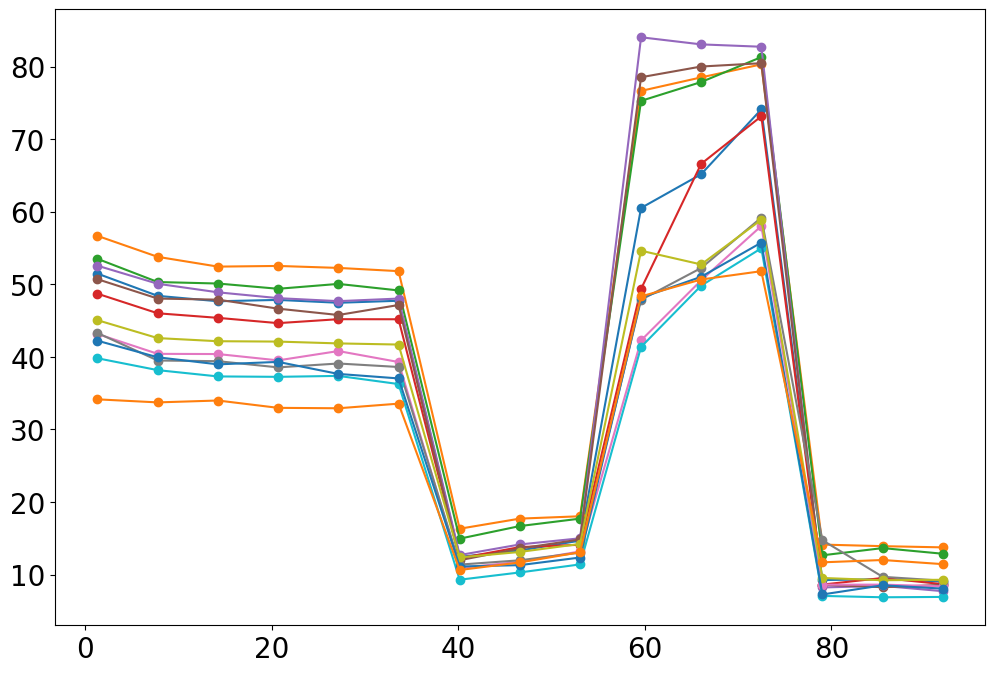

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells], 'o-')
matplotlib.pyplot.show()

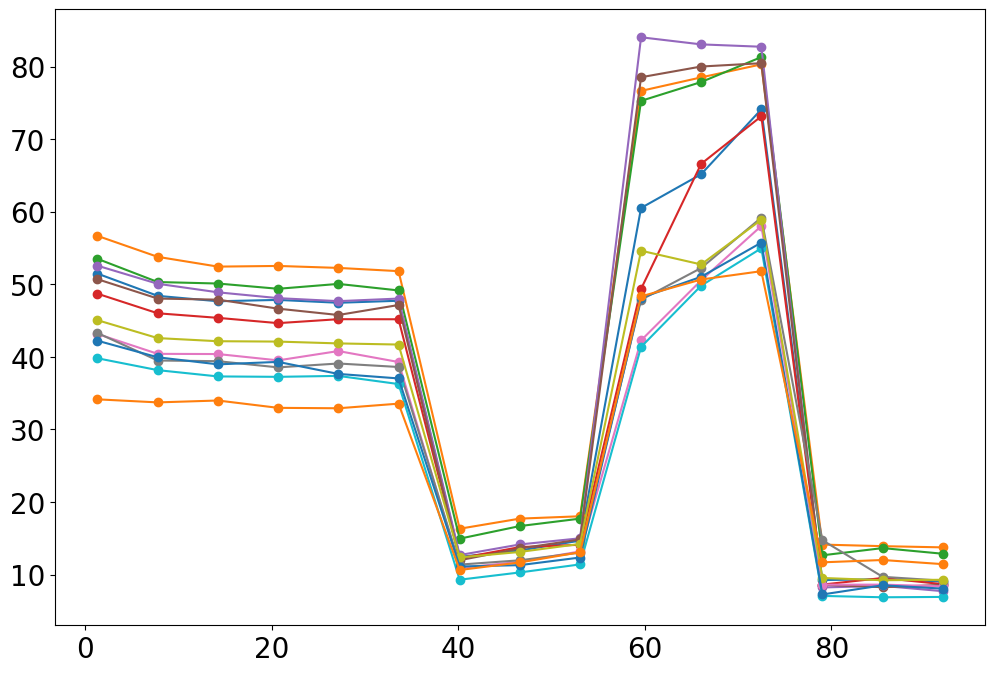

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[control_wells_representative].mean()/ocr[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ocr[control_wells_representative]/relative_mu

B02    1.068015
C02    1.240857
D02    1.196227
E02    1.015855
F02    1.169253
G02    1.130338
B11    0.871802
C11    0.894400
D11    0.936029
E11    0.811100
F11    0.857939
G11    0.808186
dtype: float64


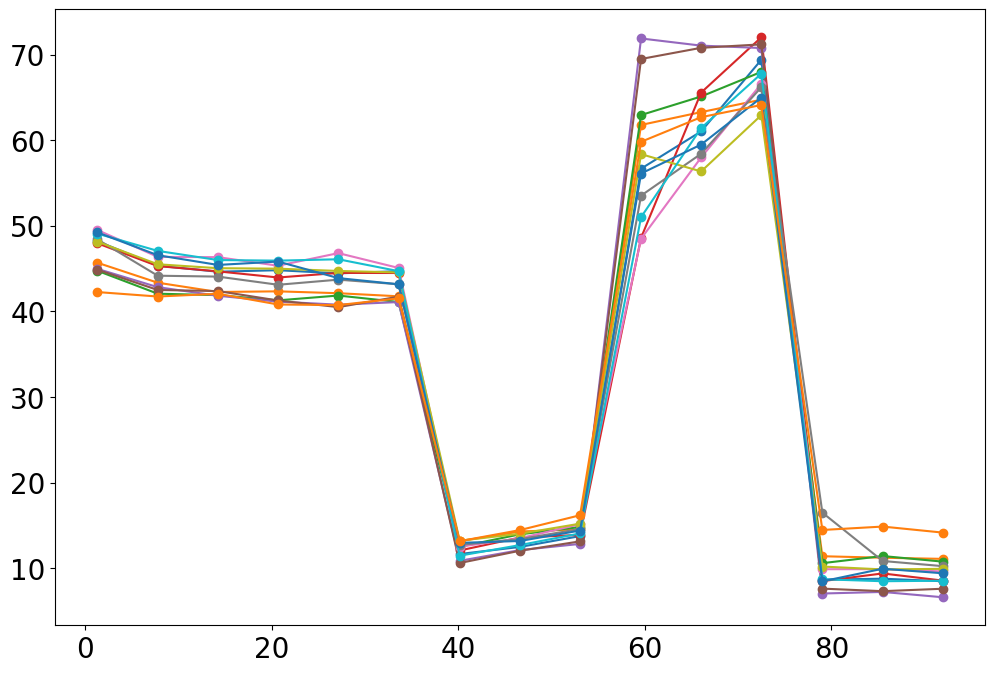

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

###**2.1.2. samples 4 h 0.5 uM**

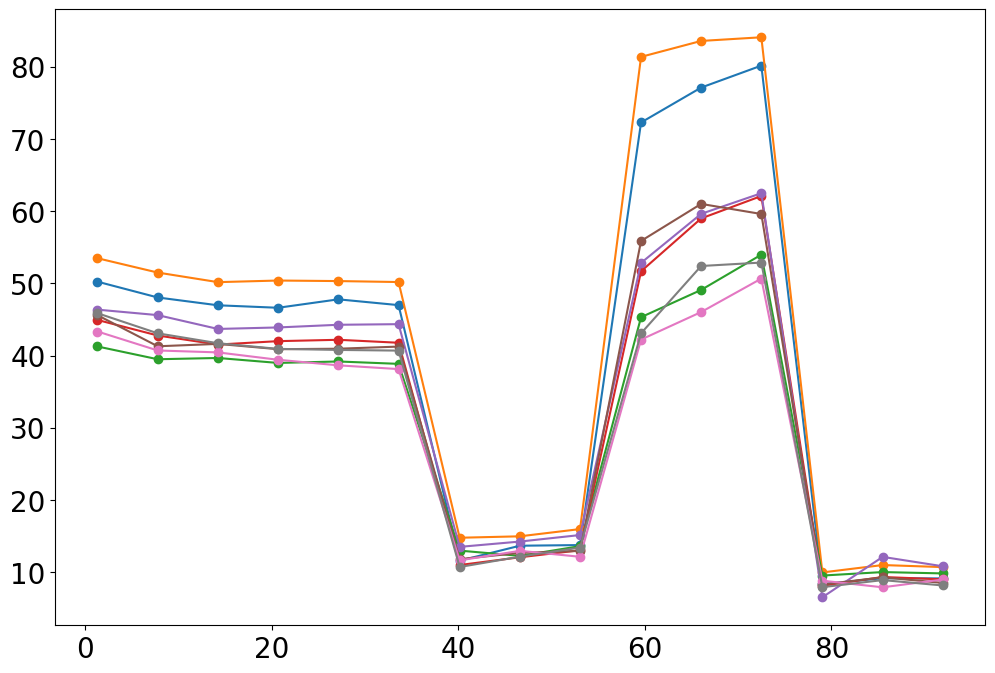

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half], 'o-')
matplotlib.pyplot.show()

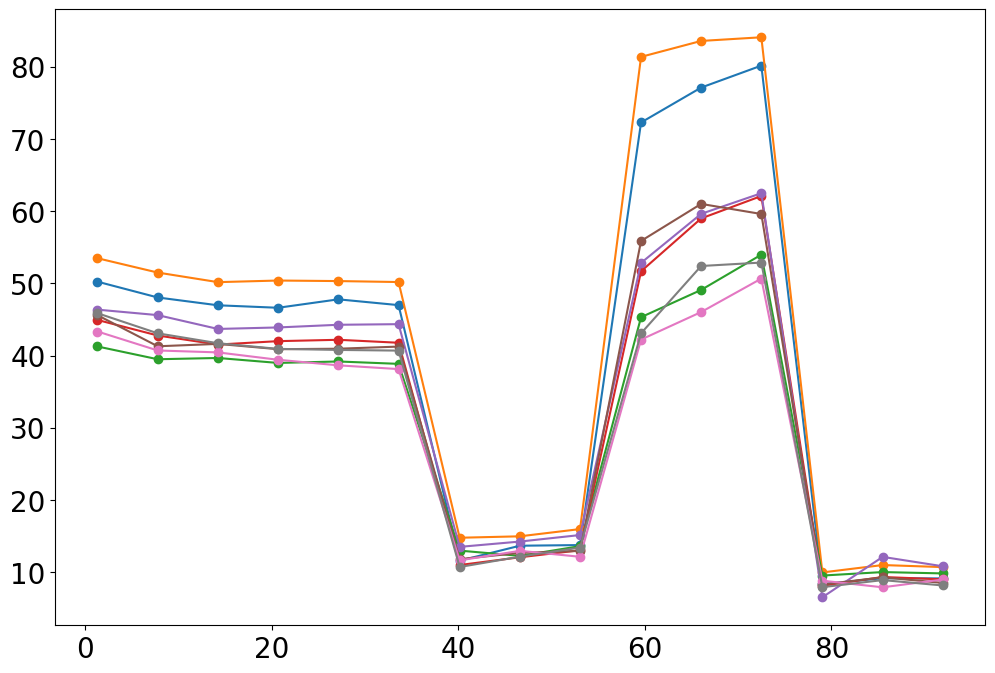

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_4h_half_representative].mean()/ocr[samples_4h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_4h_half_representative]/relative_mu

F03    1.143567
F04    1.243009
F05    0.892308
F06    0.963985
F07    1.013050
F08    0.966103
F09    0.868673
F10    0.909306
dtype: float64


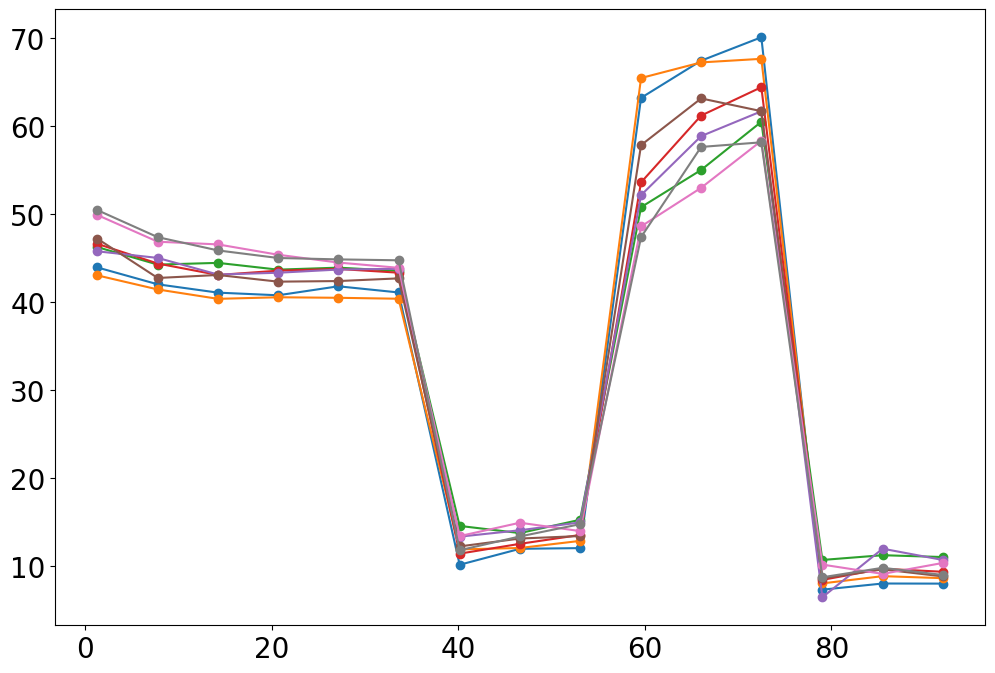

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

###**2.1.3. samples 4 h five**

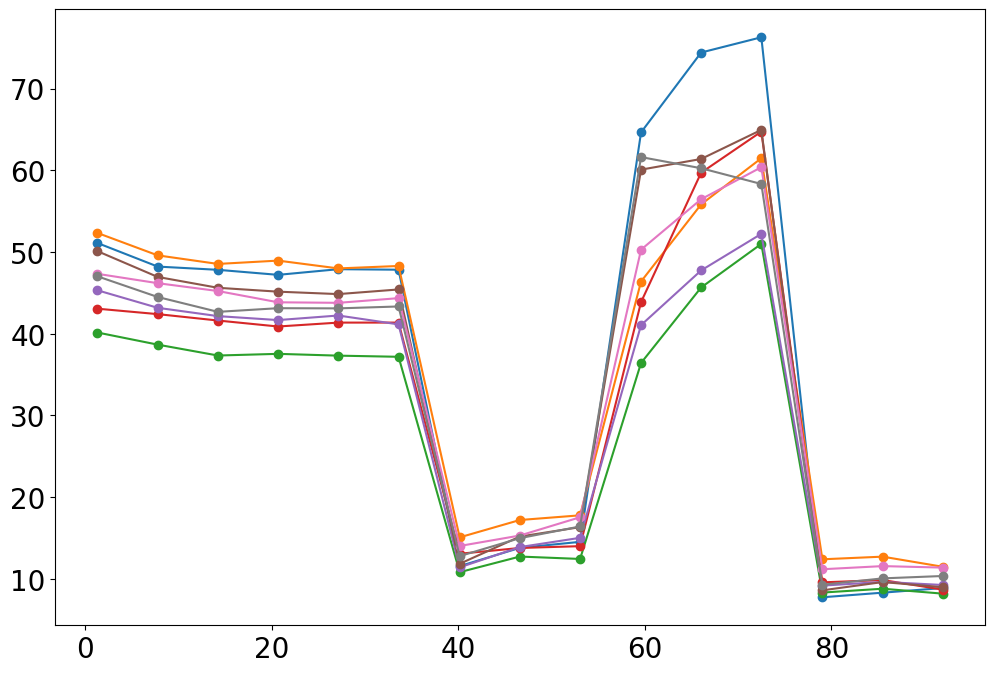

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five], 'o-')
matplotlib.pyplot.show()

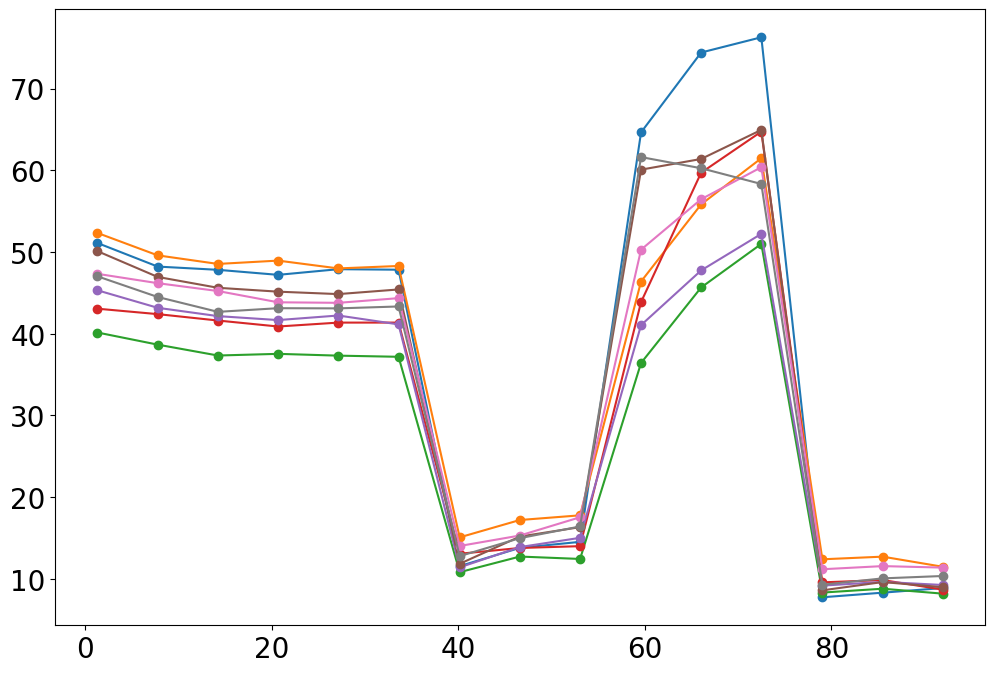

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_4h_five_representative].mean()/ocr[samples_4h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_4h_five_representative]/relative_mu

E03    1.122627
E04    1.075008
E05    0.831872
E06    0.960661
E07    0.915604
E08    1.053340
E09    1.021442
E10    1.019447
dtype: float64


In [ ]:
ocr[samples_4h_five_representative].mean().mean()

33.86911456019378

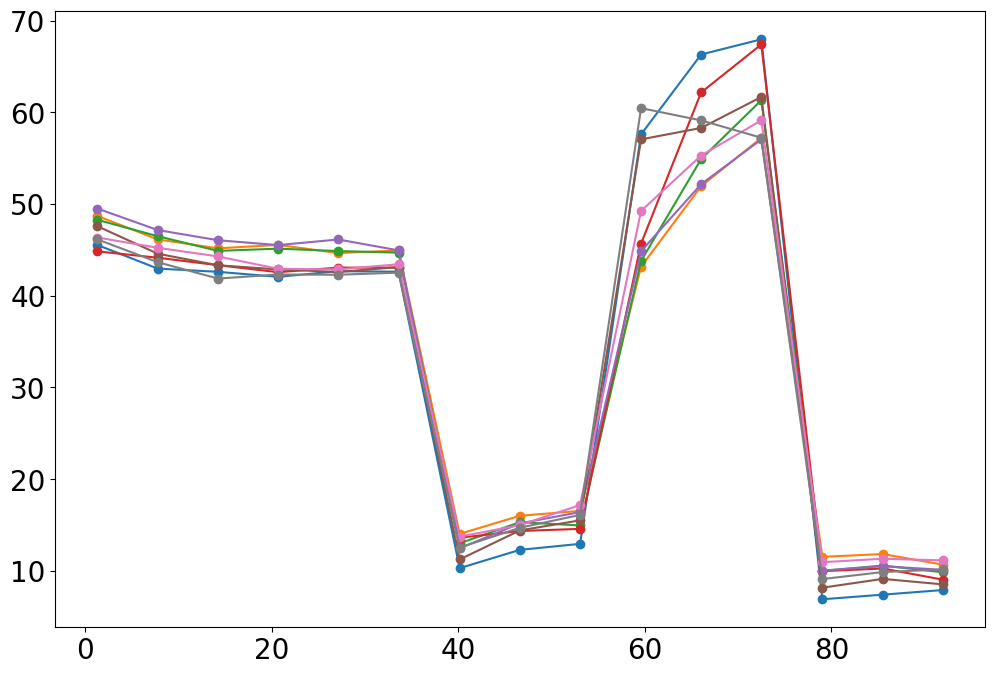

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

###**2.1.4. build figure**

In [ ]:
#black = ocr[control_wells_representative]
#green = ocr[samples_4h_half_representative]
#orange = ocr[samples_4h_five_representative]

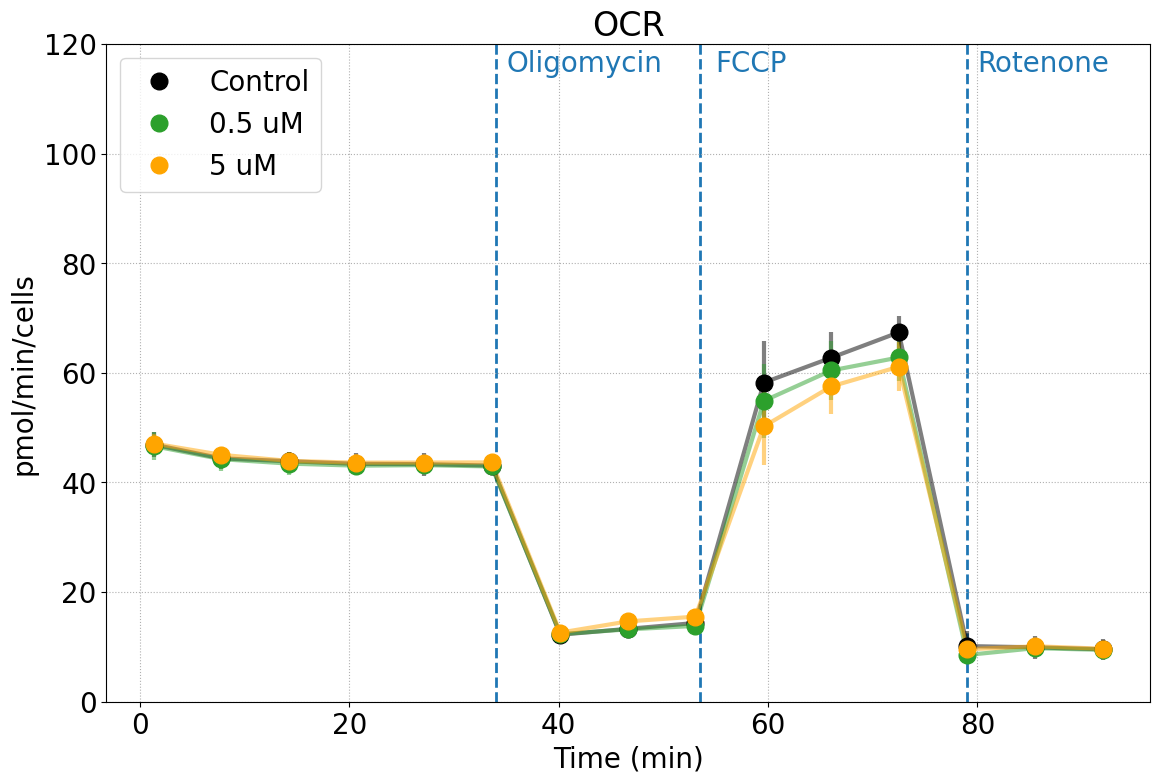

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
#mean = black.mean(axis=1)
#std = black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='Control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
#mean = green.mean(axis=1)
#std = green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
#mean = orange.mean(axis=1)
#std = orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 115, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 115, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 115, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 120])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.4h.ea.nonorm.png')

In [ ]:
normalized_black.iloc[5, :].to_list()
#normalized_black.iloc[9, :]

[44.69477770144233,
 41.758570003193064,
 41.09379447316552,
 44.479369214359885,
 41.08398222931072,
 41.71268721717879,
 45.070373335177344,
 43.16422510995882,
 44.54991335336925,
 44.69734064046877,
 43.162585583815265,
 41.51725518343859]

In [ ]:
normalized_black

B02        C02        D02        E02        F02        G02  \
0   48.195339  45.675717  44.734112  47.946358  44.958479  44.858622   
1   45.329211  43.347039  42.062756  45.290493  42.827070  42.498967   
2   44.630544  42.261918  41.890187  44.670752  41.820004  42.366385   
3   44.805638  42.336733  41.284815  43.954073  41.134147  41.267051   
4   44.436194  42.118052  41.846532  44.489601  40.778156  40.493901   
5   44.694778  41.758570  41.093794  44.479369  41.083982  41.712687   
6   11.645448  13.148661  12.493079  12.056390  10.850111  10.591525   
7   12.472041  14.271663  13.946096  13.571553  12.100815  12.027596   
8   13.738831  14.532074  14.802204  13.880718  12.826202  13.124440   
9   56.669506  61.779076  62.936824  48.594607  71.883431  69.486387   
10  61.022069  63.279309  65.103099  65.561514  71.045998  70.791724   
11  69.395193  64.727494  67.979965  72.022106  70.767340  71.196119   
12   8.648717  11.386353  10.576223   8.479836   7.029240   7.602423   
13   8.762913  11.211760  11.408159   9.376698   7.215568   7.304330   
14   8.464800  11.076803  10.753375   8.537154   6.590678   7.589063   

          B11        C11        D11        E11        F11        G11  
0   49.501612  48.402242  48.135016  49.078534  49.219039  42.252112  
1   46.362546  44.164034  45.499682  47.063232  46.557509  41.731560  
2   46.329387  44.058752  45.040372  45.993526  45.422491  42.053147  
3   45.329399  43.105075  44.986206  45.924690  45.817988  40.802108  
4   46.803906  43.702353  44.717136  46.084398  43.885166  40.729524  
5   45.070373  43.164225  44.549913  44.697341  43.162586  41.517255  
6   12.502995  12.711972  13.203326  11.451324  12.947273  13.145711  
7   13.484208  13.377370  14.010961  12.688143  13.166773  14.440376  
8   15.130339  14.569326  15.192144  14.052075  14.389855  16.176820  
9   48.485125  53.518889  58.366034  51.001503  56.103459  59.809716  
10  57.977837  58.415422  56.344744  61.413396  59.486801  62.688118  
11  66.581065  66.186081  62.925390  67.772765  64.978149  64.110140  
12   9.870858  16.477477  10.181430   8.697757   8.454540  14.455011  
13   9.873160  10.829979   9.845578   8.465930   9.924942  14.852829  
14   9.608410  10.228024   9.913290   8.526607   9.394652  14.146795

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[9, :].to_list()
b =  normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

###**2.1.5. statistical differences**

In [ ]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values

    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)

    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)

    print()

1.30918720666667

7.76478752

14.221831665

20.6730230183333

27.1312371533333

33.59055002

40.1423949633333

46.5991212866667
five: significant 0.00409621338413908

53.0533432416667
five: significant 0.03142017940779551

59.5916292183333
five: significant 0.04734460585853775

66.0339349033333
five: significant 0.038707628800508063

72.4885716483333
half: significant 0.015860919266492024
five: significant 0.005493371437643883

79.0329284583333

85.4964233383333

91.9617501183333



##**2.2. work with 24 hours data**

In [ ]:
samples_24h_half = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']
samples_24h_five = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']

samples_24h_half_representative = ['C03', 'C04', 'C05', 'C07', 'C08', 'C09', 'C10']
samples_24h_five_representative = ['B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']

###**2.2.1. half**

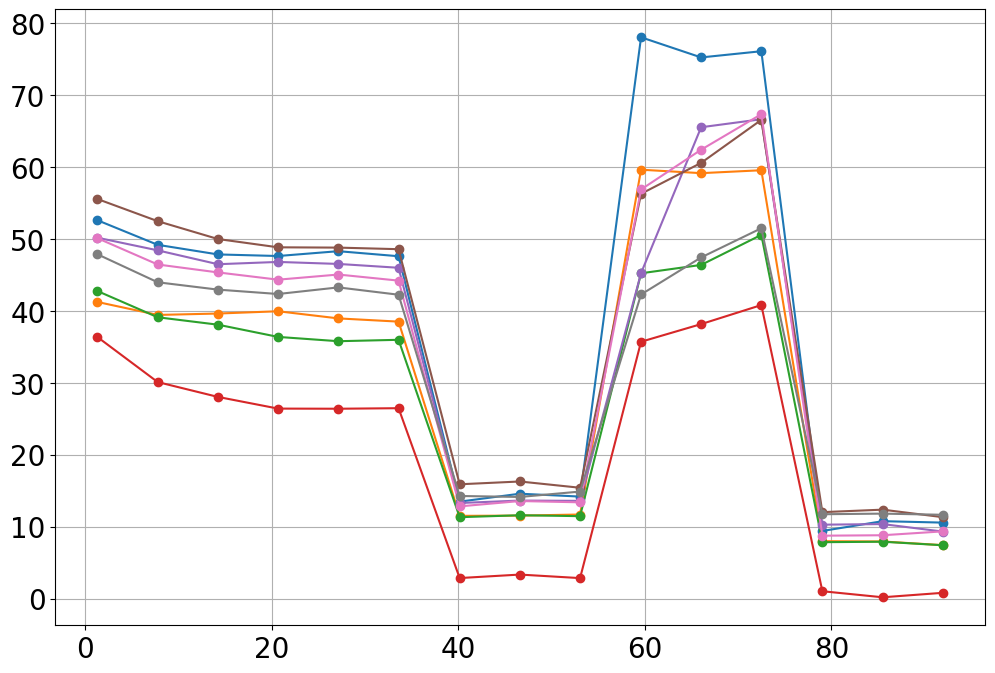

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_half], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

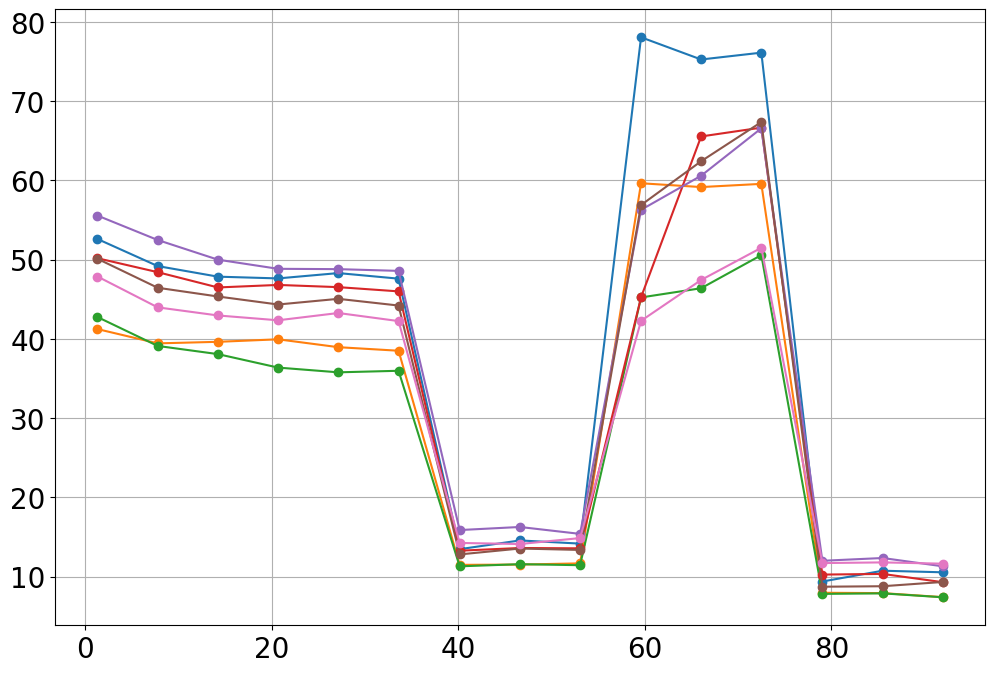

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_half_representative], 'o-')
matplotlib.pyplot.grid()
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_24h_half_representative].mean()/ocr[samples_24h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ocr[samples_24h_half_representative]/relative_mu

C03    1.154206
C04    0.918880
C05    0.829084
C07    1.031633
C08    1.106542
C09    1.024870
C10    0.934785
dtype: float64


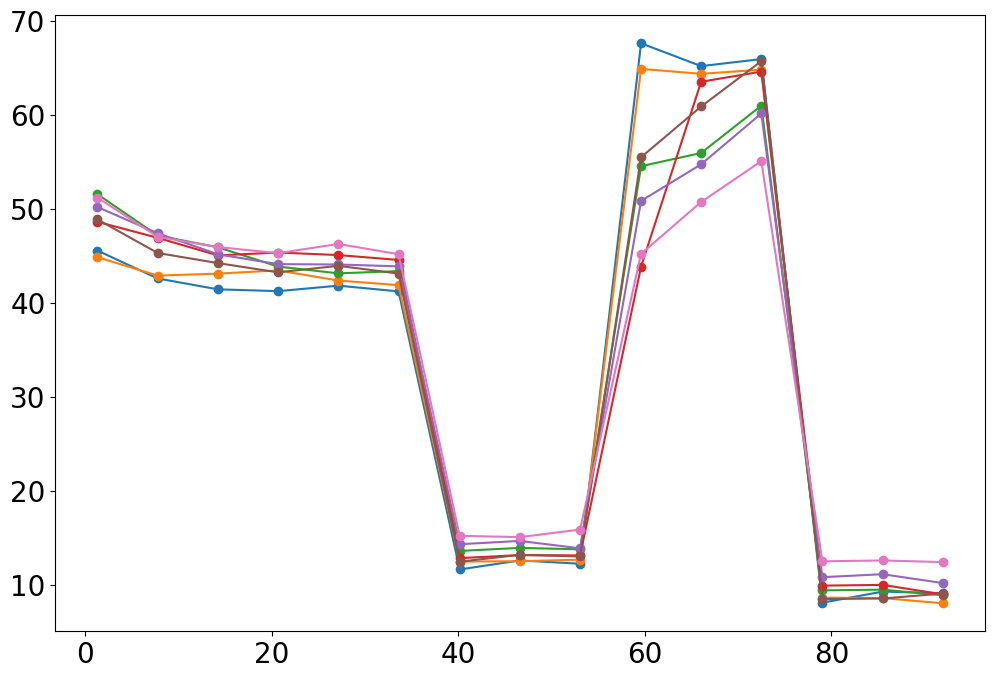

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

###**2.2.2. five**

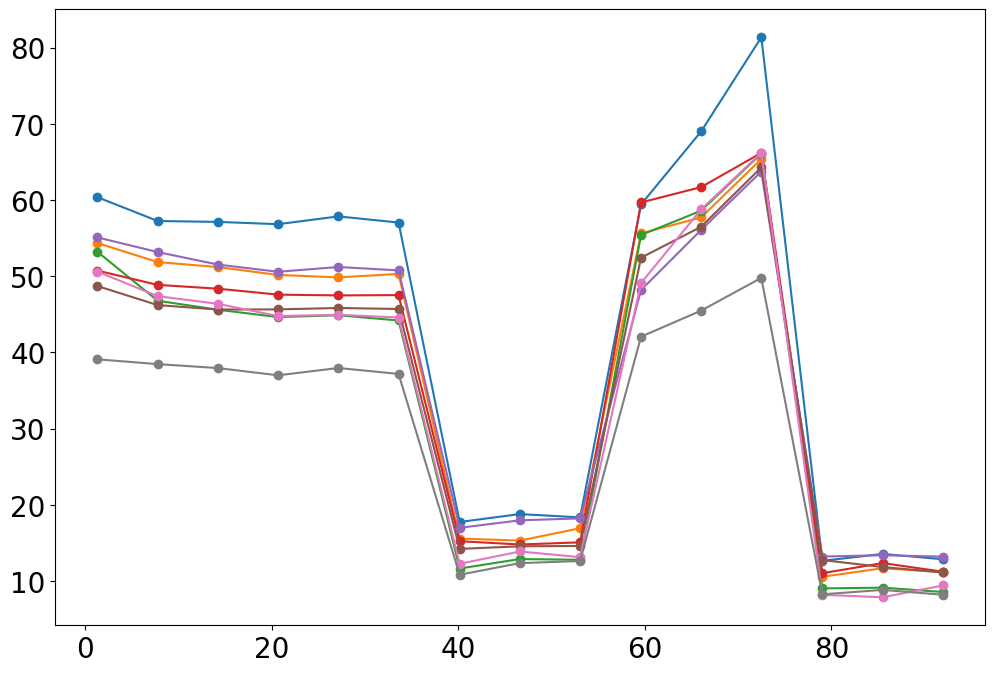

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five], 'o-')
matplotlib.pyplot.show()

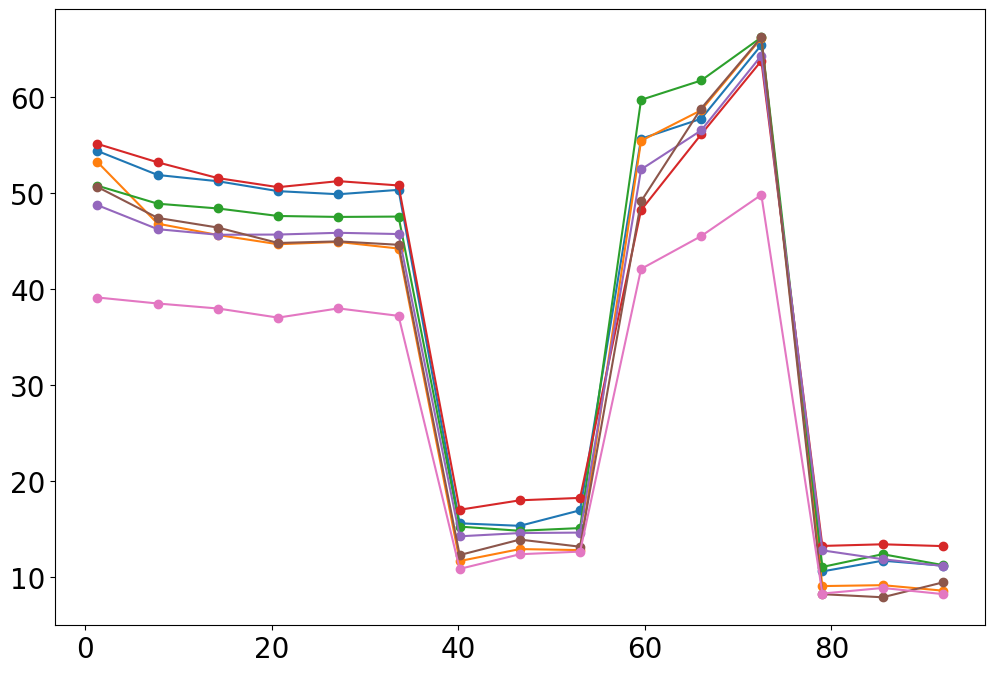

In [ ]:
matplotlib.pyplot.plot(timepoints, ocr[samples_24h_five_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ocr[samples_24h_five_representative].mean()/ocr[samples_24h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ocr[samples_24h_five_representative]/relative_mu

B04    1.075161
B05    0.991411
B06    1.056505
B07    1.085895
B08    1.003886
B09    0.980123
B10    0.807018
dtype: float64


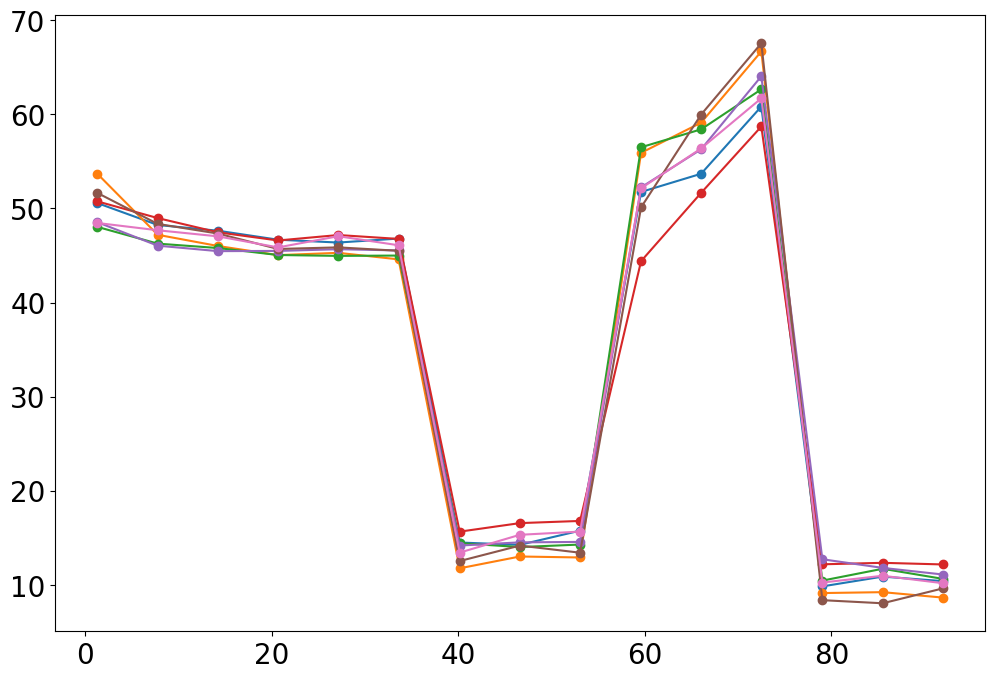

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

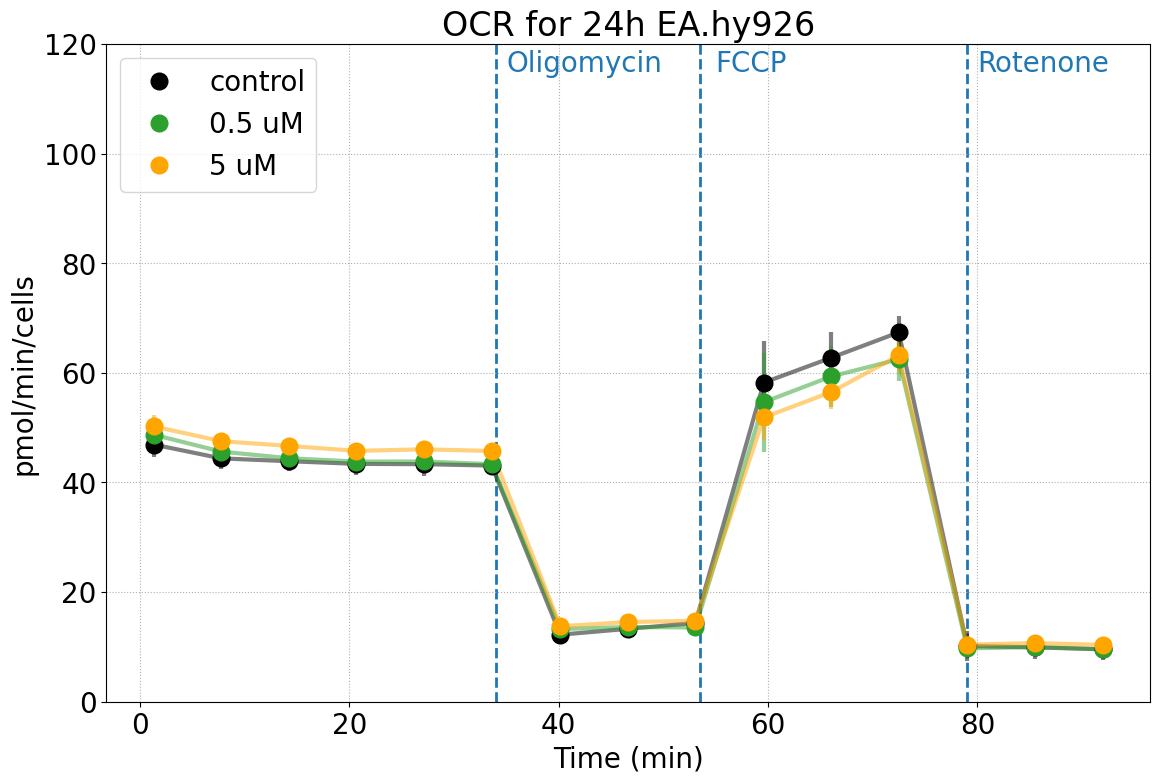

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=12, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=12, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=12, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 115, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 115, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 115, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('pmol/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 120])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('OCR for 24h EA.hy926')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.24h.ea.nonorm.png')

In [ ]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
atp_drop = numpy.mean(normalized_orange.iloc[6, :] - normalized_orange.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_orange.iloc[5, :]))

print(atp_drop, rel)

atp_drop = numpy.mean(normalized_green.iloc[6, :] - normalized_green.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_green.iloc[5, :]))

print(atp_drop, rel)

atp_drop = numpy.mean(normalized_black.iloc[6, :] - normalized_black.iloc[5, :])
rel = 100*(-atp_drop / numpy.mean(normalized_black.iloc[5, :]))

print(atp_drop, rel)

-31.973362905713234 69.89002663568051
-30.077080667571074 69.4056061545499
-30.853088356902774 71.61467943657745


In [ ]:
# statistical tests
for i in range(len(timepoints)):
    timepoint = timepoints[i]
    x = normalized_black.iloc[i, :].values
    y = normalized_green.iloc[i, :].values
    z = normalized_orange.iloc[i, :].values

    stata, pvaluea = scipy.stats.mannwhitneyu(x, y)
    statb, pvalueb = scipy.stats.mannwhitneyu(x, z)

    print(timepoint)
    if pvaluea < 0.05:
        print('half: significant', pvaluea)
    if pvalueb < 0.05:
        print('five: significant', pvalueb)

    print()

1.30918720666667
five: significant 0.009764229578471065

7.76478752
five: significant 0.0011907597046915933

14.221831665
five: significant 0.0007541478129713423

20.6730230183333
five: significant 0.007184250218305946

27.1312371533333
five: significant 0.0037310470747003253

33.59055002
five: significant 0.0004763038818766373

40.1423949633333
five: significant 0.012979280781138367

46.5991212866667
five: significant 0.022108438517107247

53.0533432416667

59.5916292183333

66.0339349033333
five: significant 0.00523934270064301

72.4885716483333
half: significant 0.012979280781138367
five: significant 0.012979280781138367

79.0329284583333

85.4964233383333

91.9617501183333



##**2.3. boxplots**

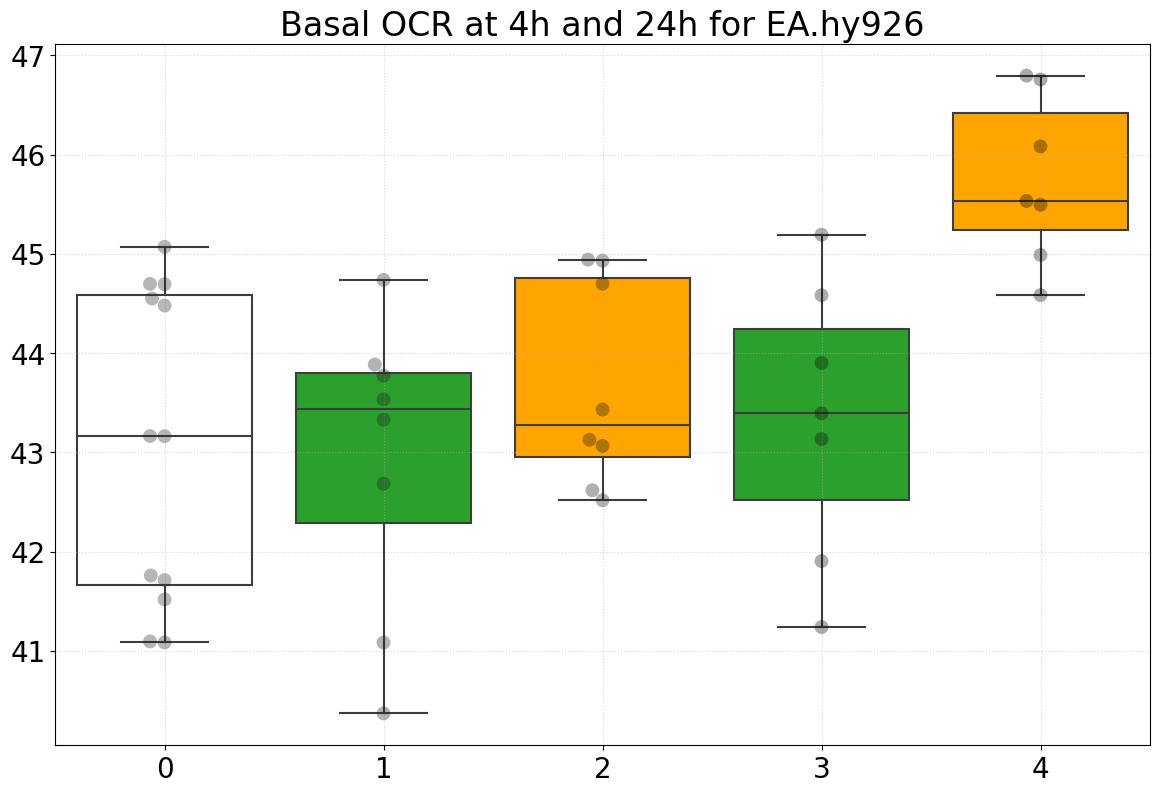

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal OCR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.basal.ea.nonorm.png')

In [ ]:
#canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)
#canvas.artists[0].set_facecolor('white')
#canvas.artists[1].set_facecolor('#2CA02C')
#canvas.artists[2].set_facecolor('#FFA500')
#canvas.artists[3].set_facecolor('#2CA02C')
#canvas.artists[4].set_facecolor('#FFA500')

#seaborn.swarmplot(data=boxplot_basal, color='black', alpha=1/3, size=10)

#matplotlib.pyplot.grid(ls=':', alpha=0.5)
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.savefig('ocr.basal.jpg')

In [ ]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

72.0 1.0
	 43.08207283707319 43.08207283707319 1.0
52.0 0.7920774787647853
	 43.08207283707319 42.924120540450325 0.9963336885571823
36.0 0.3837421608319441
	 43.08207283707319 43.66592004234658 1.0135519757250624
37.0 0.7108438517107247
	 43.08207283707319 43.33523231624332 1.0058762139910844
4.0 0.0004763038818766373
	 43.08207283707319 45.748105194439965 1.0618826389215095


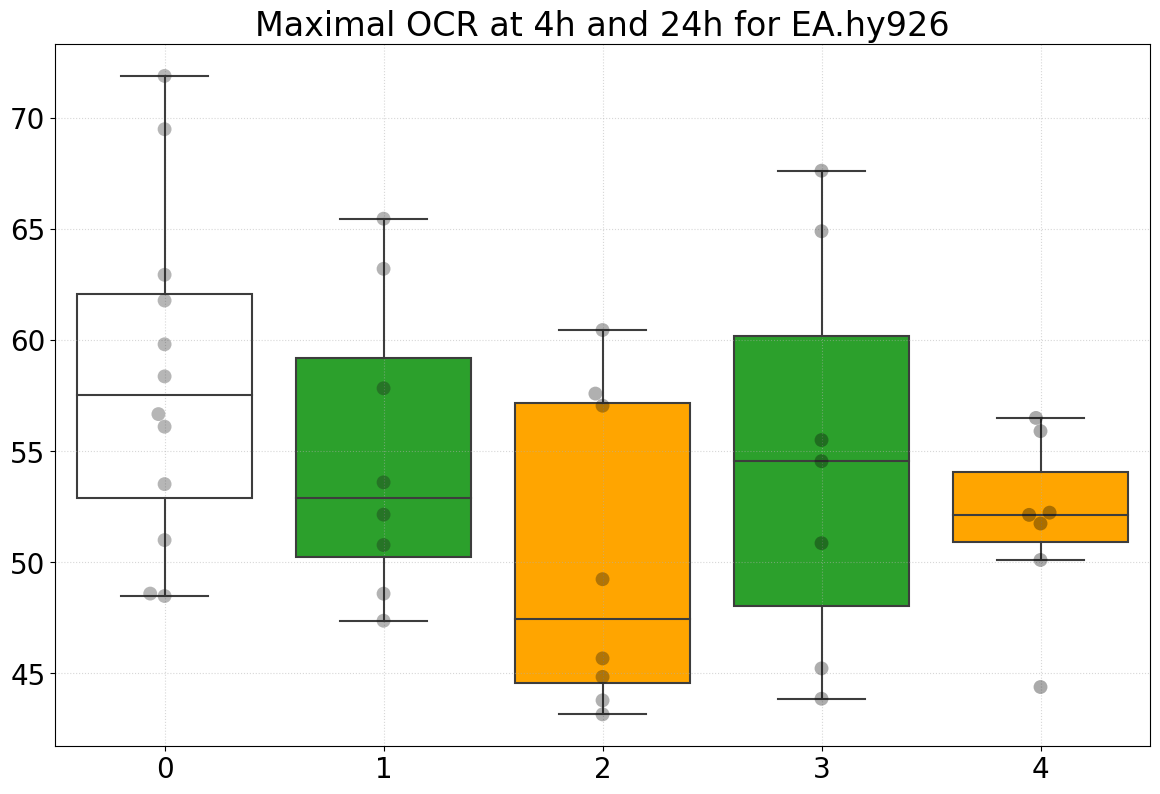

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Maximal OCR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ocr.maximal.ea.nonorm.png')

In [ ]:
#canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)
#canvas.artists[0].set_facecolor('#f5f5f5')
#canvas.artists[1].set_facecolor('#2CA02C')
#canvas.artists[2].set_facecolor('#FFA500')
#canvas.artists[3].set_facecolor('#2CA02C')
#canvas.artists[4].set_facecolor('#FFA500')

#seaborn.swarmplot(data=boxplot_maximal, color='black', alpha=1/3, size=10)
#seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)
#matplotlib.pyplot.grid(ls=':', alpha=0.5)
#matplotlib.pyplot.tight_layout()

#matplotlib.pyplot.savefig('ocr.maximal.svg')

In [ ]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

72.0 1.0
	 58.21954642336499 58.21954642336499 1.0
60.0 0.3837421608319441
	 58.21954642336499 54.8731526528253 0.9425211294810655
74.0 0.04734460585853775
	 58.21954642336499 50.2264763160327 0.862708135010058
54.0 0.34023973962054455
	 58.21954642336499 54.64621440759763 0.9386231560482703
64.0 0.06834960704929745
	 58.21954642336499 51.85989893336305 0.8907643930484204


#**3. ECAR**

In [ ]:
boxplot_basal = []
boxplot_maximal = []

In [ ]:
ecar

time        B02        C02        D02        E02        F02  \
0    1.309187  27.823065  30.174518  27.570220  27.345001  30.708393   
1    7.764788  22.289855  23.976752  21.096374  21.789562  24.598198   
2   14.221832  22.452936  24.095037  21.639713  21.777798  25.057498   
3   20.673023  22.754562  24.339788  21.863539  21.781338  24.902340   
4   27.131237  22.874437  24.490845  21.950116  21.950238  24.972786   
5   33.590550  22.779128  24.629351  21.818718  21.842318  24.921822   
6   40.142395  44.204284  48.269864  41.965124  42.737987  47.027500   
7   46.599121  40.711403  45.732243  38.189658  38.993511  43.080920   
8   53.053343  41.795120  46.547527  38.950939  38.930447  43.727681   
9   59.591629  39.819687  43.352822  38.321432  38.674264  43.202642   
10  66.033935  37.319518  41.130293  36.356025  36.516088  40.906938   
11  72.488572  36.292436  39.942868  34.807879  35.482493  39.384863   
12  79.032928  39.571104  41.787237  36.637779  38.158010  40.136978   
13  85.496423  37.527998  40.607328  35.769922  36.818672  39.542717   
14  91.961750  35.003938  37.841244  33.076140  34.650482  37.477629   

          G02        B03        B04        B05  ...        G07        G08  \
0   30.201352  25.833039  28.446084  26.589668  ...  30.803087  32.256419   
1   24.662669  20.566965  22.287814  20.899061  ...  24.818133  25.987186   
2   23.995659  20.779721  22.011558  21.666147  ...  25.122287  25.923683   
3   24.389388  21.229365  22.020762  21.183206  ...  25.056723  25.630991   
4   24.505572  21.533333  22.380979  21.361427  ...  25.408668  25.996998   
5   24.534016  21.234103  21.817109  21.235960  ...  25.282243  25.564197   
6   46.024376  45.700447  46.230368  43.730441  ...  43.051406  43.306749   
7   41.697994  42.737075  42.919433  41.095368  ...  39.232509  39.210065   
8   42.379175  43.220551  43.226441  42.306403  ...  40.238595  39.446231   
9   41.377205  37.643247  37.856058  38.360894  ...  38.172698  38.469004   
10  38.316026  36.208304  36.169142  33.837671  ...  37.037787  36.483473   
11  37.441359  34.910424  35.015686  35.351735  ...  36.012582  35.398603   
12  37.438320  38.343925  37.790922  39.225109  ...  37.027274  37.514015   
13  36.475481  36.380179  36.938068  37.620639  ...  36.703304  36.718597   
14  35.264021  33.592154  33.725934  34.238811  ...  34.414047  34.911835   

          G09        G10        B11         C11        D11        E11  \
0   29.131900  32.542338  25.605208   24.524329  25.275242  23.911722   
1   23.391632  25.772183  20.225080   19.438664  19.600346  18.548552   
2   22.934436  25.418540  20.261611   19.520367  19.838585  18.416641   
3   22.896635  24.996361  20.614173   19.345615  19.822892  18.488260   
4   22.935737  25.276318  20.696301   19.484710  20.080433  18.496857   
5   22.767571  25.433002  20.454572   19.585038  20.031875  18.757535   
6   38.940453  40.312528  37.997812   36.542699  38.033283  35.847107   
7   35.876304  38.649628  34.433063   32.453400  33.838145  31.762828   
8   36.335751  38.975658  34.673755   32.510379  34.272402  31.775807   
9   35.062257  37.043278  34.119934   32.540924  33.401030  32.147551   
10  33.532097  37.400429  32.355562   30.967772  31.689329  30.268674   
11  32.990690  37.288670  31.536304   29.895040  30.117574  29.440528   
12  34.510967  36.059465  32.914372 -389.888898  32.199360  31.485797   
13  34.210290  36.135780  32.627627   21.780624  32.172815  31.147143   
14  31.129349  34.053862  32.976464   25.363104  30.314543  28.972019   

          F11        G11  
0   24.483857  26.397796  
1   19.196623  19.277413  
2   19.152293  18.410768  
3   19.162654  18.528403  
4   18.794106  18.281703  
5   19.180662  18.083467  
6   35.924526  32.370035  
7   31.894061  28.582418  
8   31.639809  28.444667  
9   31.966254  29.319684  
10  30.529092  28.080219  
11  29.357622  27.241672  
12  31.178265  26.915727  
13  30.956916  27.310676  
14  28.755149  26.353194  

[15 rows x 61 columns

In [ ]:
control_wells = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'C11', 'D11', 'E11', 'F11', 'G11']
samples_4h_half = ['F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10']
samples_4h_five = ['E03', 'E04', 'E05', 'E06', 'E07', 'E08', 'E09', 'E10']

In [ ]:
control_wells_representative = ['B02', 'C02', 'D02', 'E02', 'F02', 'G02', 'B11', 'D11', 'E11', 'F11', 'G11']
samples_4h_half_representative = ['F03', 'F04', 'F05', 'F06', 'F08', 'F10']
samples_4h_five_representative = samples_4h_five

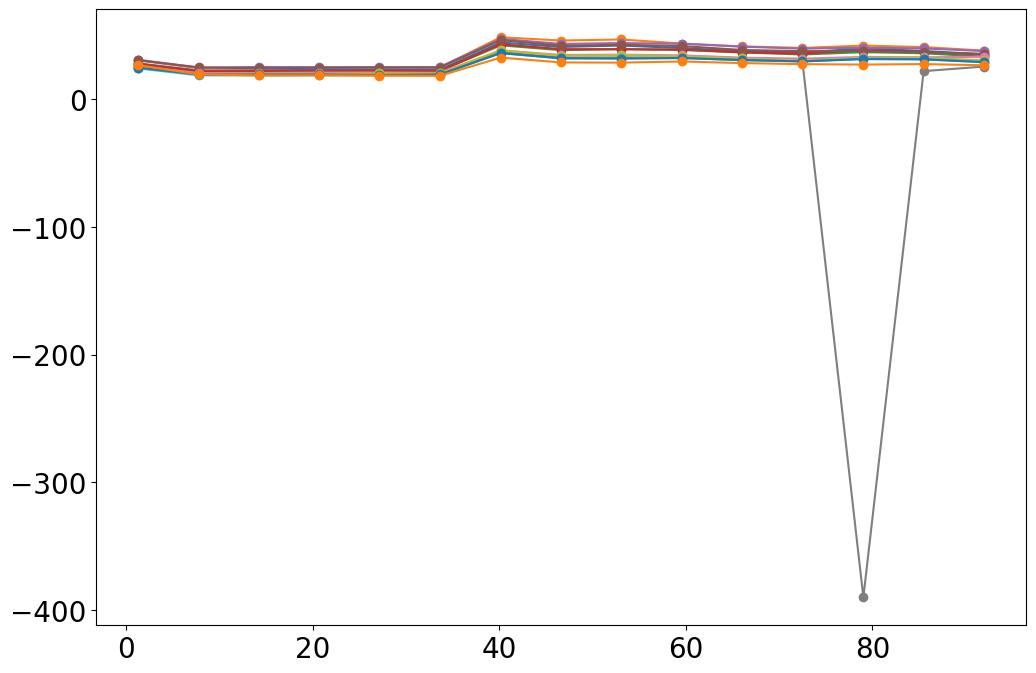

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells], 'o-')
matplotlib.pyplot.show()

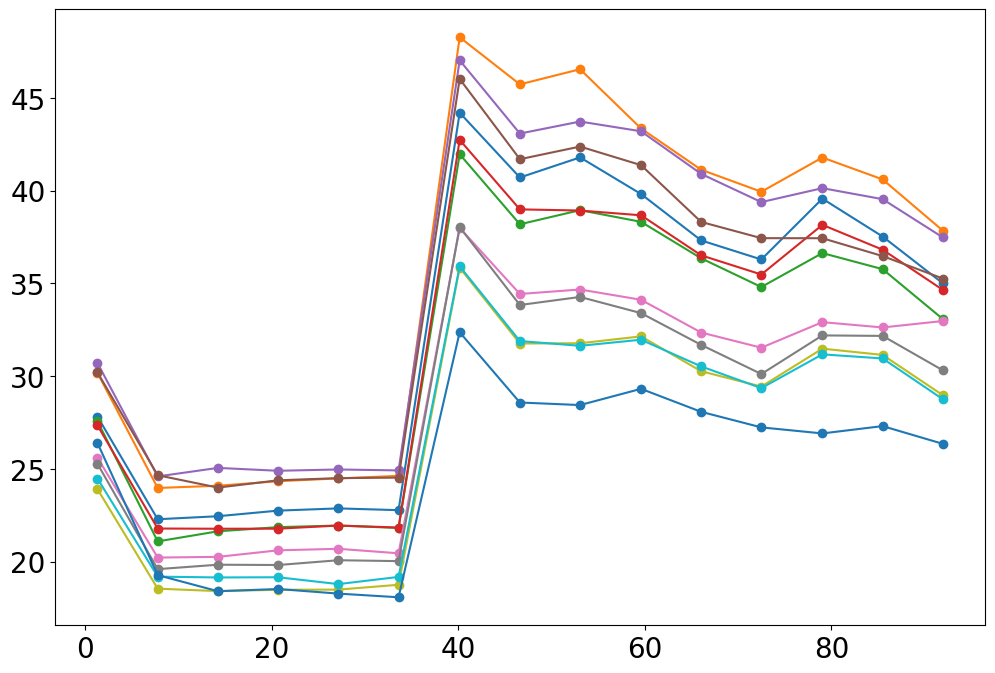

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[control_wells_representative], 'o-')
matplotlib.pyplot.show()

In [ ]:
relative_mu = ecar[control_wells_representative].mean()/ecar[control_wells_representative].mean().mean()
print(relative_mu)
normalized_black = ecar[control_wells_representative]/relative_mu

B02    1.075752
C02    1.171062
D02    1.025138
E02    1.041354
F02    1.155208
G02    1.109522
B11    0.941119
D11    0.917555
E11    0.871271
F11    0.877170
G11    0.814848
dtype: float64


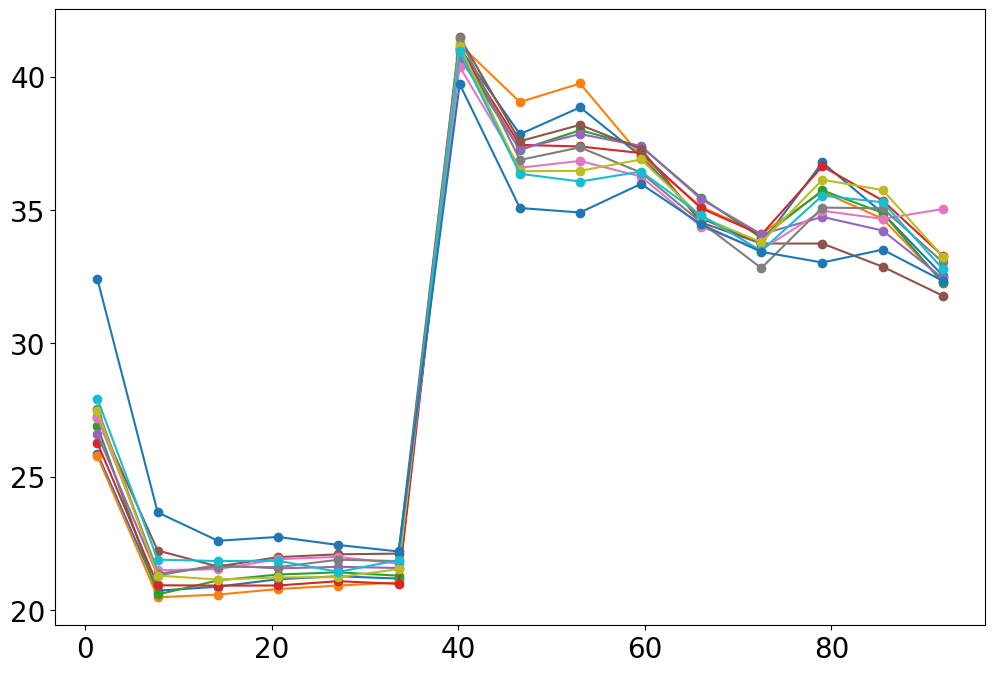

In [ ]:
matplotlib.pyplot.plot(timepoints, normalized_black, 'o-')
matplotlib.pyplot.show()

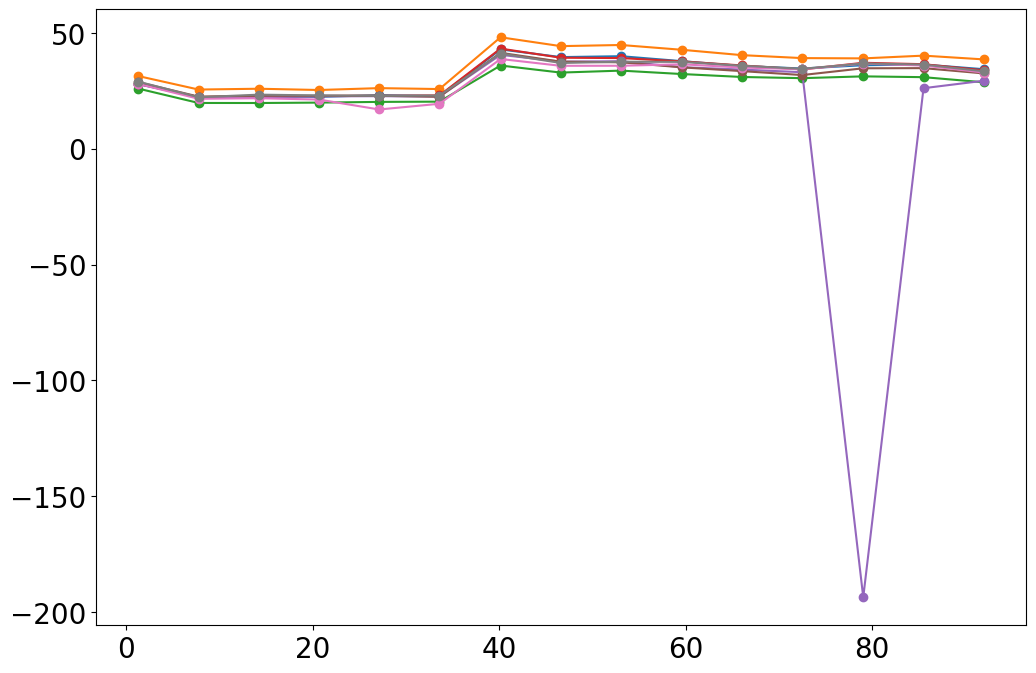

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half], 'o-')
matplotlib.pyplot.show()

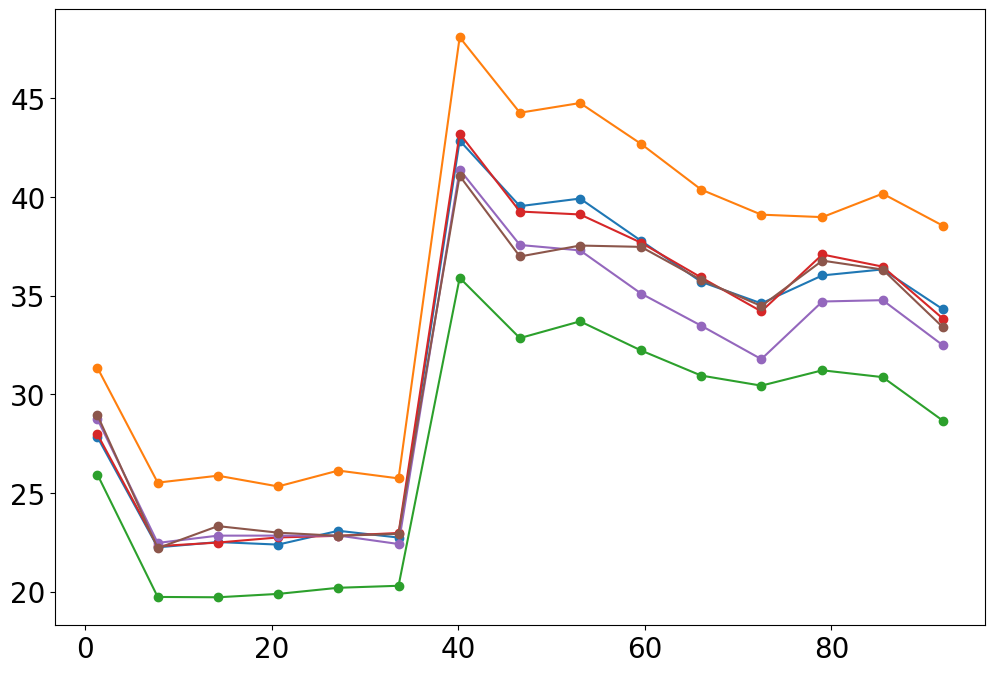

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_half_representative], 'o-')
matplotlib.pyplot.show()

F03    1.009843
F04    1.134624
F05    0.871916
F06    1.010337
F08    0.973621
F10    0.999658
dtype: float64


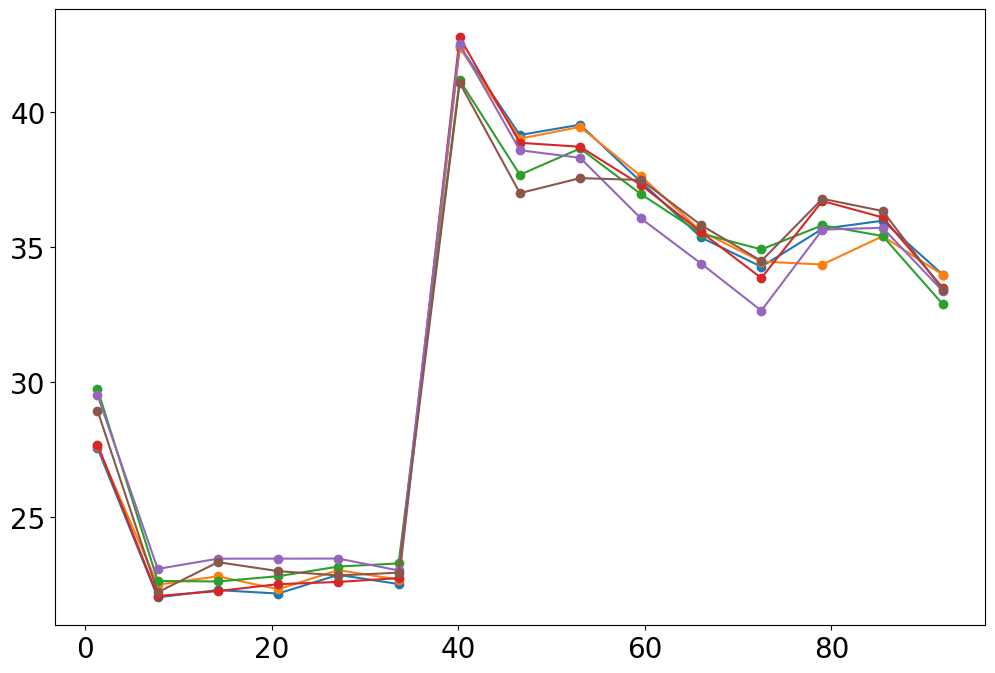

In [ ]:
relative_mu = ecar[samples_4h_half_representative].mean()/ecar[samples_4h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_4h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

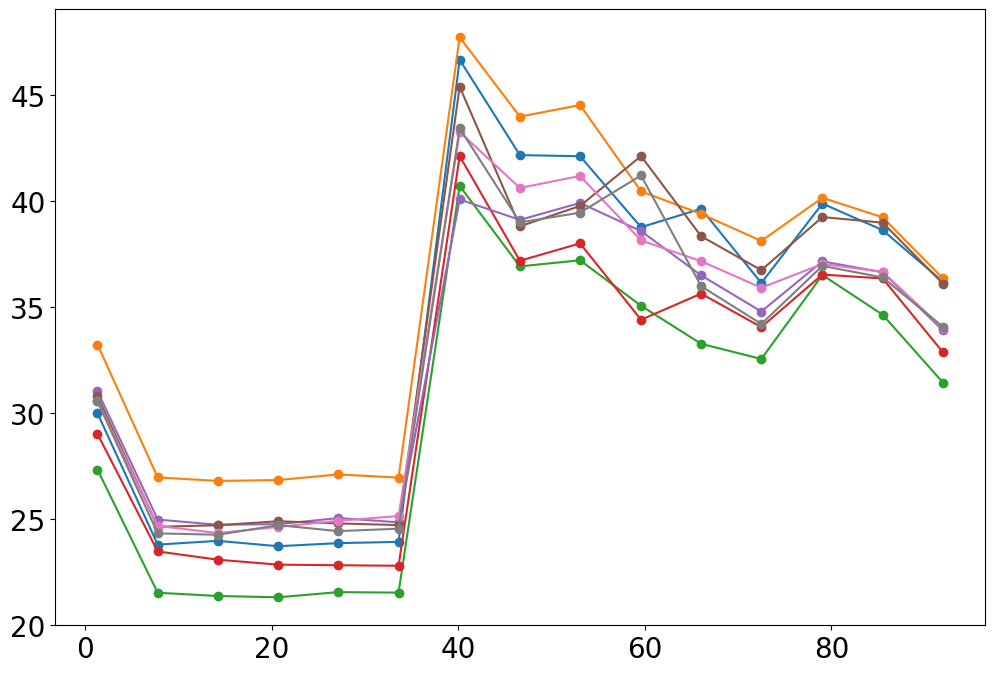

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five], 'o-')
matplotlib.pyplot.show()

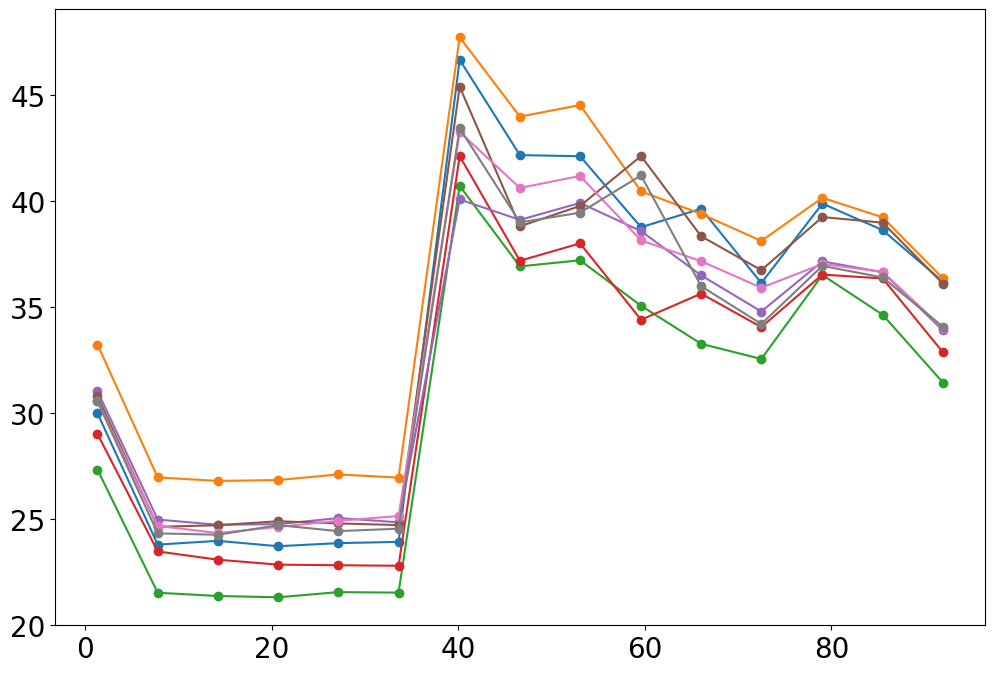

E03    1.027858
E04    1.085167
E05    0.913721
E06    0.950582
E07    0.992726
E08    1.029055
E09    1.005239
E10    0.995653
dtype: float64


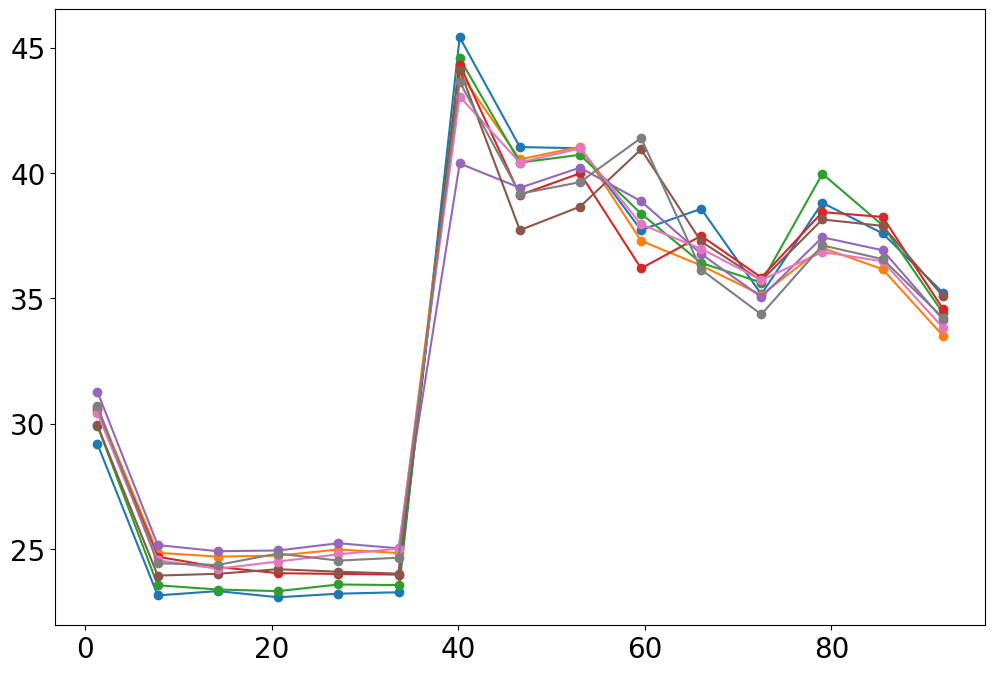

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_4h_five_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_4h_five_representative].mean()/ecar[samples_4h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_4h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

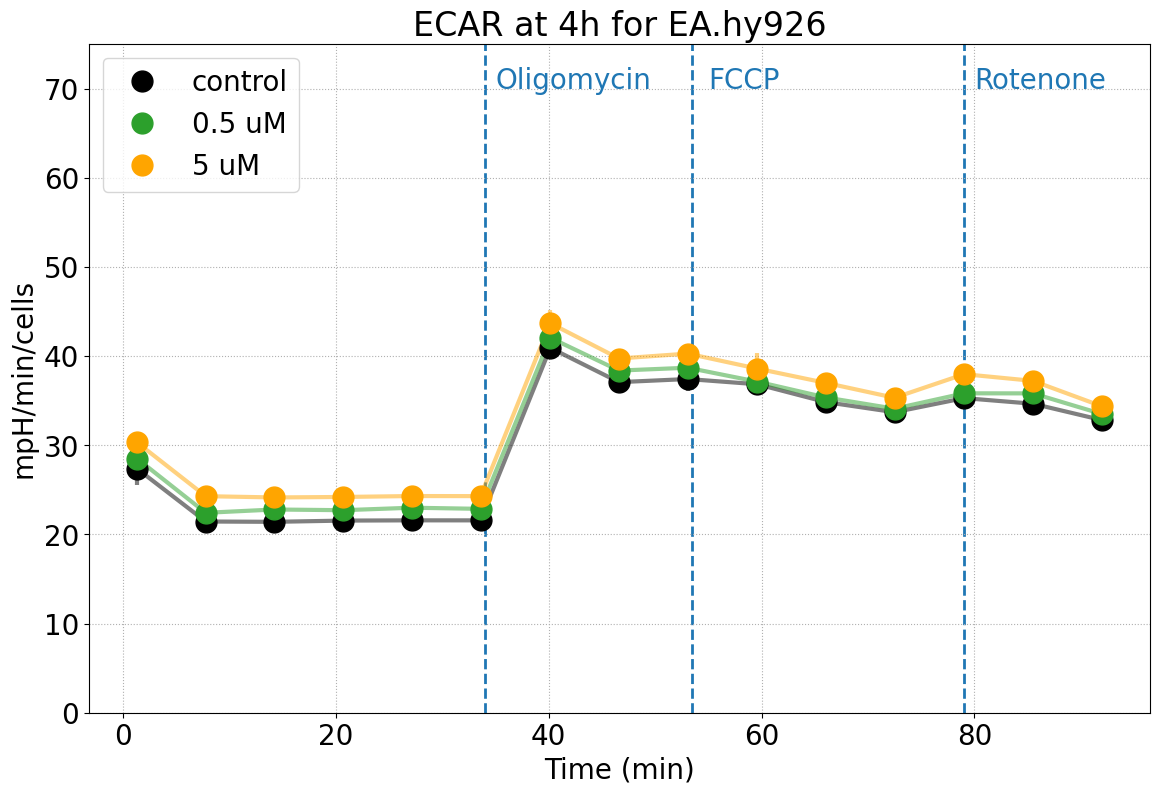

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 70, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 70, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 70, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 75])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('ECAR at 4h for EA.hy926')

#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ecar.4h.ea.nonorm.png')

In [ ]:
a = normalized_black.iloc[5, :].to_list()
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(a); boxplot_basal.append(b); boxplot_basal.append(c)

a = normalized_black.iloc[9, :].to_list()
b =  normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(a); boxplot_maximal.append(b); boxplot_maximal.append(c)

In [ ]:
samples_24h_half = ['C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10']
samples_24h_five = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10']

In [ ]:
samples_24h_half_representative = ['C03', 'C05', 'C06', 'C07', 'C08', 'C10']
samples_24h_five_representative = ['B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09']

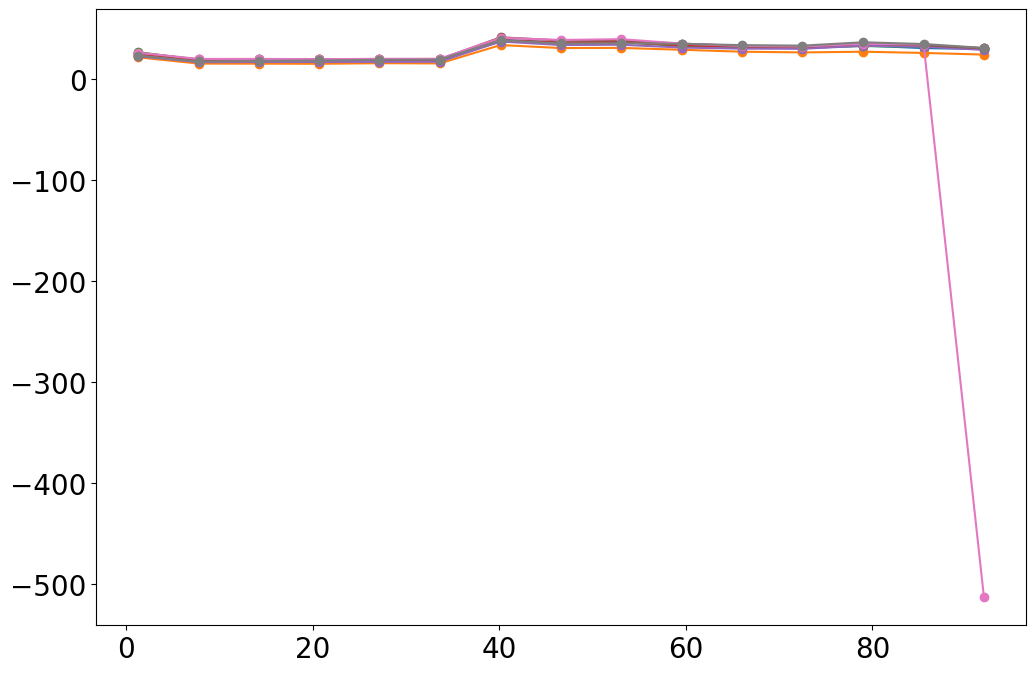

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half], 'o-')
matplotlib.pyplot.show()

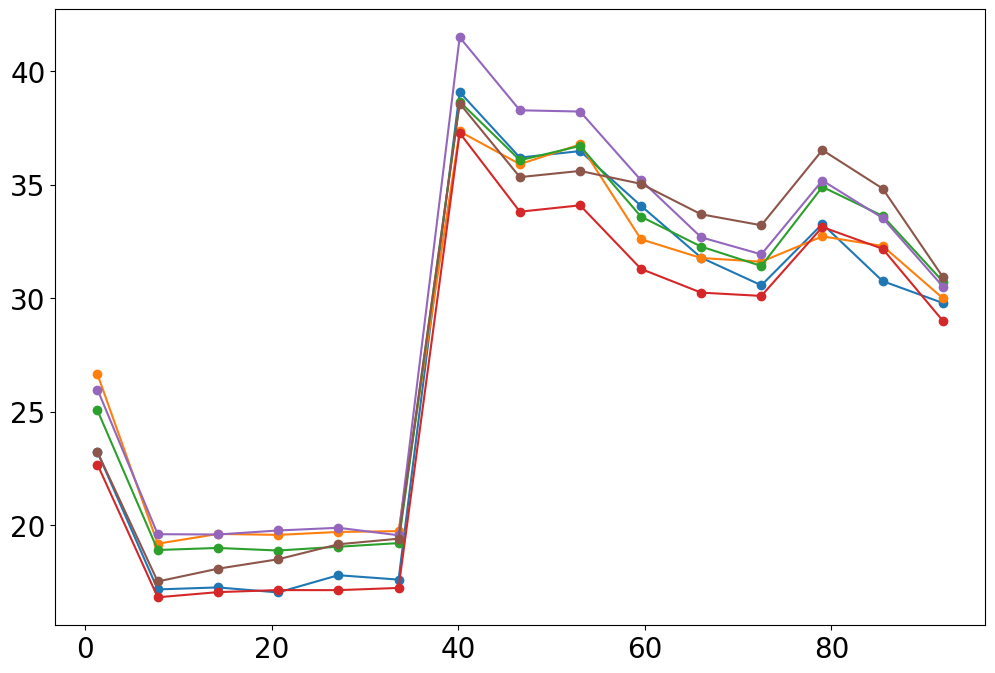

C03    0.974998
C05    1.006681
C06    1.012883
C07    0.944545
C08    1.044375
C10    1.016518
dtype: float64


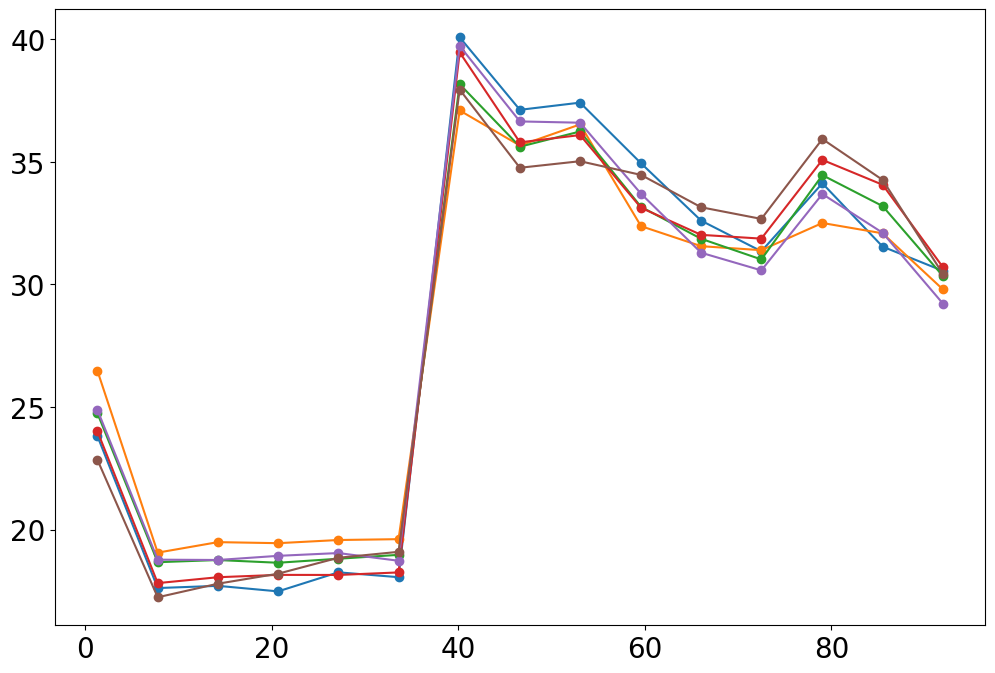

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_half_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_half_representative].mean()/ecar[samples_24h_half_representative].mean().mean()
print(relative_mu)
normalized_green = ecar[samples_24h_half_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_green, 'o-')
matplotlib.pyplot.show()

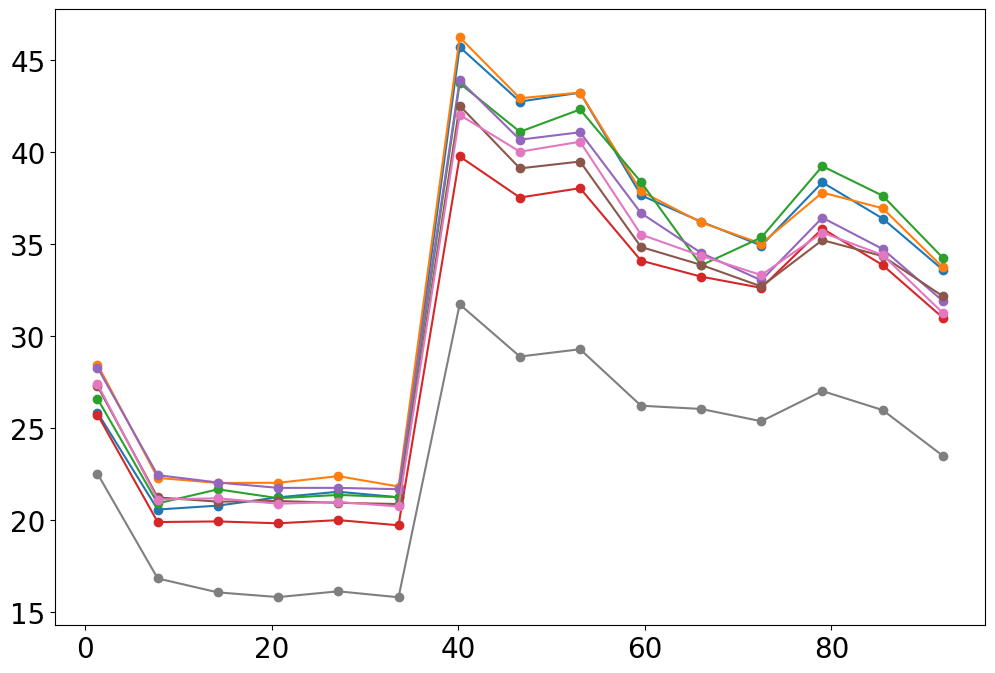

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_five], 'o-')
matplotlib.pyplot.show()


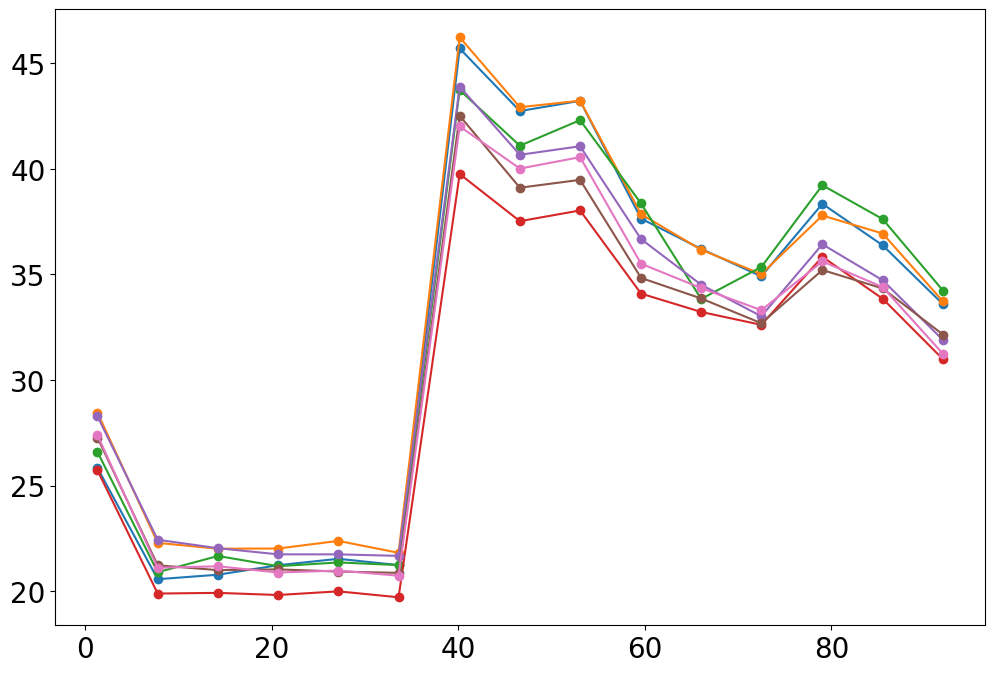

B03    1.025776
B04    1.044849
B05    1.023189
B06    0.942507
B07    1.006266
B08    0.975746
B09    0.981668
dtype: float64


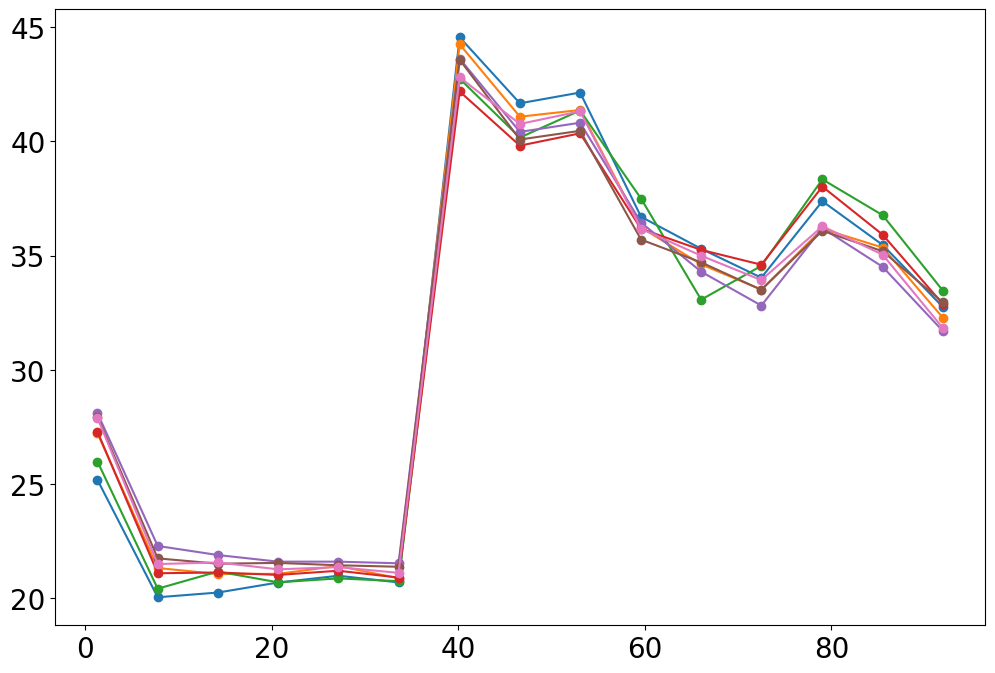

In [ ]:
matplotlib.pyplot.plot(timepoints, ecar[samples_24h_five_representative], 'o-')
matplotlib.pyplot.show()

relative_mu = ecar[samples_24h_five_representative].mean()/ecar[samples_24h_five_representative].mean().mean()
print(relative_mu)
normalized_orange = ecar[samples_24h_five_representative]/relative_mu

matplotlib.pyplot.plot(timepoints, normalized_orange, 'o-')
matplotlib.pyplot.show()

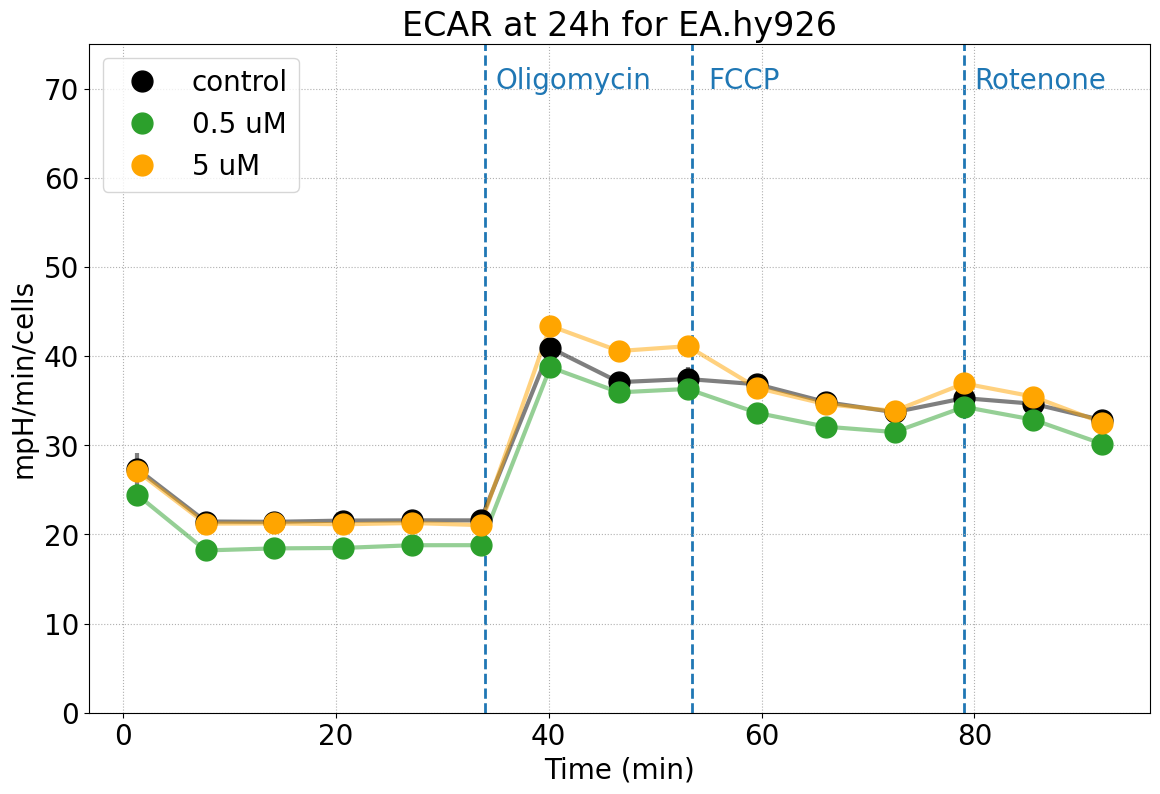

In [ ]:
mean = normalized_black.mean(axis=1)
std = normalized_black.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='black', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='black', ms=15, label='control', zorder=999)

mean = normalized_green.mean(axis=1)
std = normalized_green.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#2CA02C', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#2CA02C', ms=15, label='0.5 uM', zorder=999)

mean = normalized_orange.mean(axis=1)
std = normalized_orange.std(axis=1)
matplotlib.pyplot.errorbar(timepoints, mean, std, lw=3, color='#FFA500', alpha=1/2)
matplotlib.pyplot.plot(timepoints, mean, 'o', color='#FFA500', ms=15, label='5 uM', zorder=999)

matplotlib.pyplot.grid(ls=':')

matplotlib.pyplot.axvline(x=34, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=53.5, ls='--', lw=2, color='tab:blue', zorder=1)
matplotlib.pyplot.axvline(x=79, ls='--', lw=2, color='tab:blue', zorder=1)

matplotlib.pyplot.text(35, 70, 'Oligomycin', color='tab:blue')
matplotlib.pyplot.text(55, 70, 'FCCP', color='tab:blue')
matplotlib.pyplot.text(80, 70, 'Rotenone', color='tab:blue')

matplotlib.pyplot.xlabel('Time (min)')
matplotlib.pyplot.ylabel('mpH/min/cells')
matplotlib.pyplot.legend(loc=2)
matplotlib.pyplot.ylim([0, 75])
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('ECAR at 24h for EA.hy926')
#matplotlib.pyplot.show()

matplotlib.pyplot.savefig('ecar.24h.ea.nonorm.png')

In [ ]:
b = normalized_green.iloc[5, :].to_list()
c = normalized_orange.iloc[5, :].to_list()
boxplot_basal.append(b); boxplot_basal.append(c)

b = normalized_green.iloc[9, :].to_list()
c = normalized_orange.iloc[9, :].to_list()
boxplot_maximal.append(b); boxplot_maximal.append(c)

##**3.3. boxplots**

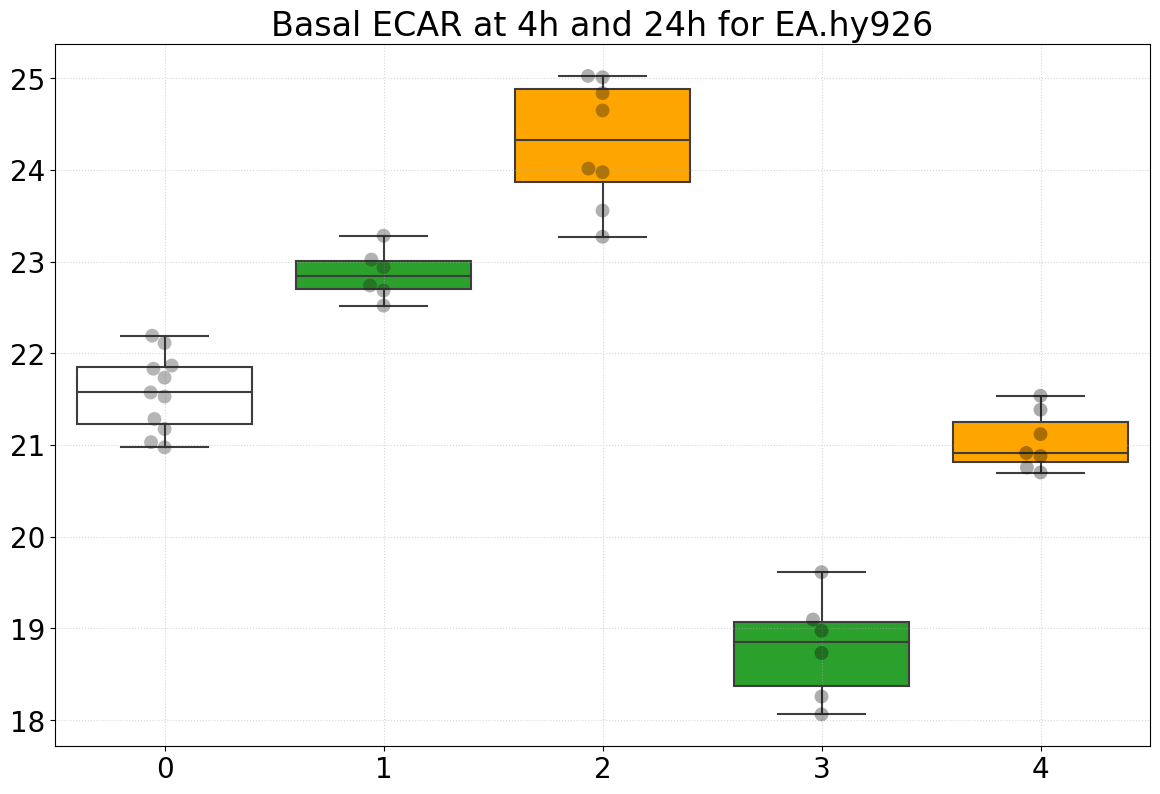

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_basal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_basal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Basal ECAR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()


matplotlib.pyplot.savefig('ecar.basal.ea.nonorm.png')

In [ ]:
for i in range(len(boxplot_basal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_basal[0], boxplot_basal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_basal[0])
    b = numpy.mean(boxplot_basal[i])
    fc = b / a
    print('\t', a, b, fc)

60.5 1.0
	 21.57318208333525 21.57318208333525 1.0
0.0 0.00016160310277957336
	 21.57318208333525 22.864610687056928 1.0598626850101671
0.0 2.6461326770924294e-05
	 21.57318208333525 24.29217928347971 1.126035982528735
66.0 0.00016160310277957336
	 21.57318208333525 18.790090404480082 0.8709929917568796
66.0 0.01137506284565108
	 21.57318208333525 21.041555148755823 0.9753570459598495


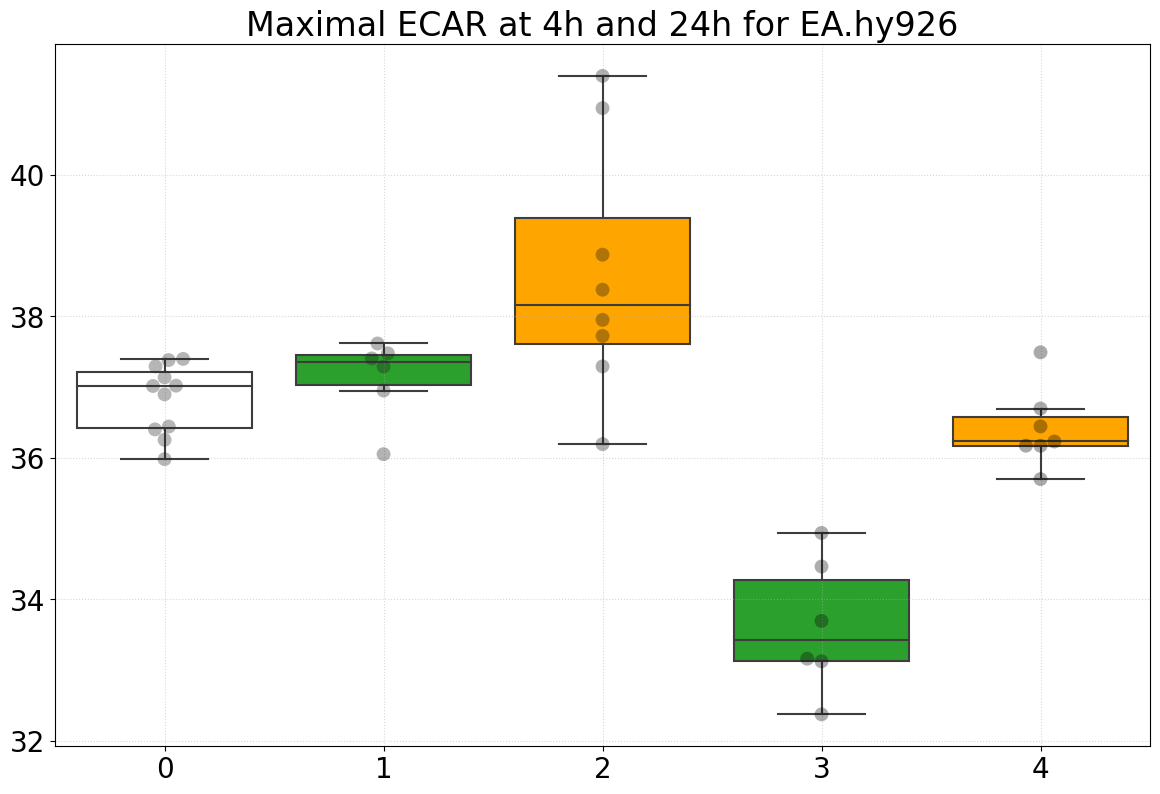

In [ ]:
# Create a boxplot
canvas = seaborn.boxplot(data=boxplot_maximal, showfliers=False)

# Define the colors for the boxes
colors = ['white', '#2CA02C', '#FFA500', '#2CA02C', '#FFA500']

# Set the colors for each box
for i, box in enumerate(canvas.patches):
    box.set_facecolor(colors[i])

# Add a swarmplot on top of the boxplot
seaborn.swarmplot(data=boxplot_maximal, palette='dark:black', alpha=1/3, size=10)

# Add grid and adjust layout
matplotlib.pyplot.grid(ls=':', alpha=0.5)
matplotlib.pyplot.tight_layout()
matplotlib.pyplot.title('Maximal ECAR at 4h and 24h for EA.hy926')
#matplotlib.pyplot.show()


matplotlib.pyplot.savefig('ecar.maximal.ea.nonorm.png')

In [ ]:
for i in range(len(boxplot_maximal)):
    stat, pvalue = scipy.stats.mannwhitneyu(boxplot_maximal[0], boxplot_maximal[i])
    print(stat, pvalue)

    a = numpy.mean(boxplot_maximal[0])
    b = numpy.mean(boxplot_maximal[i])
    fc = b / a
    print('\t', a, b, fc)

60.5 1.0
	 36.83866389861577 36.83866389861577 1.0
19.0 0.1801874595992243
	 36.83866389861577 37.132139077317156 1.0079664989889172
13.0 0.009102696409197957
	 36.83866389861577 38.59321731271129 1.0476280415306116
66.0 0.00016160310277957336
	 36.83866389861577 33.6266343546038 0.912808196495621
55.0 0.1508924082453494
	 36.83866389861577 36.415200957474646 0.9885049321466559
